# Final Case Study: Quantifying the World


#### Steven Hayden, Kevin Mendonsa, Joe Schueder, Nicole Wittlin  

---
# INTRODUCTION

We have been given a dataset with 50 explanatory variables and one response variable, and our objective is to minimize the cost of the predicted response using specific cost penalties. The dataset contains 160,000 observations, where the response variable "y" is binary (1, 0). Without domain knowledge or intrinsic information about the data, our analysis will begin with a comprehensive exploratory data analysis (EDA) to understand the characteristics of the data as a whole and the individual variables. Then, we will build several predictive models to minimize the cost penalties noted above. 

---

# BUSINESS OBJECTIVE

The business objective for this analysis is to specifically reduce cost penalties, which are directly related to predicted False Positive (FP) and False Negative (FN) rates. False Negatives have a major adverse impact on the business objective, so we will focus here as a priority. While important, False Positives are 50 times less impactful than False Negatives.

Specifically, we have been informed that each False Positive prediction costs the business \\$10, and each False Negative prediction has a cost of \\$500. Correct predictions -- True Positives (TP) and True Negatives (TN) -- have no impact on the business cost ($0). To find an optimal model, we will focus on the metrics of Recall and Precision. Recall is defined as True Positives divided by True Positives and False Negatives -- (TP) / (TP + FN) -- and will indicate how many results were incorrectly predicted. In complement, Precision -- (TP) /  (TP + FP) -- indicates which model is accurately picking correct classes or correctly classifying observations. While we are looking for larger Recall and Precision figures, above all else we want to minimize cost. 

The model we deliver must be able to be deployed in a production environment and be generalized for future application of new data. Below, we will detail the steps we have taken to arrive at an optimal model to recommend; the steps include a cursory data review to an in-dept data exploration and analysis, creating a baseline model, developing different predictive models, exploring dimensionality reduction, optimization and tuning the best models, and finally recommending a model to minimize business costs.

---

# EXECUTIVE SUMMARY

Here we provide an executive summary of the analysis and methodology used to explore and model the data, along with information about our evaluation process to ultimately recommend an optimal model that meets the business objective outlined. 

## Exploratory Data Analysis (EDA)

We began with basic analysis of the dataset, which has 160,000 observations (rows) and 51 attributes (columns). Most of the attributes were numeric; the remaining non-numeric data fields were explored further to determine if a conversion or encoding was needed. Additionally, we noted data was missing from 1608 observations (approximately 1.005%), which is addressed in our data processing.
    ![title](img/datatypes.png)
    
Next, we assessed several statistical assumptions, which are necessary for good model results. A profile of each attribute showed the continuous data meets the normality assumption, where data follows a normal (Gaussian) distribution. (See Pandas Profile for details.) Looking at our categorical attributes, we considered cardinality, or how many unique responses were present, to determine how to best manage this data. To validate the assumption of independence, we considered the correlation between our attributes as illustrated by the Correlation Matrix below.  
    ![title](img/PearsonCorrelation2.png) 

The results circled, where the value is 1 (Pearson correlation coefficient), indicates a strong linear relationship between the two attributes where one could predict the other with a substantial degree of accuracy. Therefore, they are not independent. Attributes x6 and x41 were excluded from further analysis as they were highly correlated with x2 and x38. Lastly, we concluded there were no outlier data points that needed to be addressed. We conclude the assumptions for modeling have been met and will next prepare the data for modeling.

## Data Processing

We began with some data clean-up to check for format and spelling consistency. We noted the following: Region (x24) has spelling and case issues; and Months (x29) and Days (x30) were inconsistent in format. We bring these to your attention merely for informational purposes. Additionally, we addressed special characters: $ was removed; and % was encoded for the cardinality as noted above.

**Missing Data Imputation Strategy**<br>
The business team shared with us that the missing data is Missing At Random (MAR), which means the probability of missing values, at random, in a variable depend only on the available information in other predictors. MAR can be handled by using information in other predictors to impute missing information, so we elected to impute missing NULL values in the continuous attributes with the "median" of the respective attribute. This methodology is appropriate given the strong normality of the data and is a common imputation method that will not be overly influenced by outlier data. For the missing values (NANs) in the categorical data, we elected to drop those 119 records rather than impute given it represented merely 0.07% of the 160,000 records.

**One-hot Encoding of Categorical Data**<br>
One Hot Encoding (ohe) is a popular approach to convert categorical data to a format that enhances the predictive capability of models. It works best when the cardinality of categorical data is low and is not advisable for attributes where there are more than 15 different classes. Given the distribution of our data as shown below, the variables x24, x29, x30, and x32 were encoded. This technique will also help us determine the significance of categorical data as part of the modeling process. For example, Asia represents approximately 86% of the observations; and the summer months of May, June, July, and August seem particularly busy, as does midweek. As we explore the attribute importance later, these may be interesting to note.

   ![title](img/onehotcandidates.png)

**Data Standardization**<br>
We elected to standardize our continuous attributes, which will compress data within specific criteria and may aid in accelerating the modeling process. Given the normality of our data as noted above, we opted for MinMax scaling to compress data into the range from 0 to 1. This can result in smaller standard deviations and suppress the impact of outliers; however, we do not anticipate an issue here given the nature of our data.     
    
**Data Balance**<br>
Comparing the outcomes of our response variable -- 0 vs 1 -- we see almost 60% of the data has a response of "0" while the outcome "1" makes up the remaining approximate 40%. We do not believe that this data is "unbalanced" but we will be mindful of this in our models to ensure the majority label is not being overclassified.
    
**Training/Testing Sampling Strategy**<br>
To create and evaluate our models, we split our data into a training set and test set. By voluntarily holding back a portion of data, we can test model performance on "new" data. Using the entire dataset to train a model will allow it to always predict a correct category for that dataset. This process also prevents a model from overfitting to the data and being too optimistic in predicting outcomes. In our analysis, we split the data into training and test data sets (75:25) randomly. Additionally, we employed Cross Validation to prevent overfitting the model to the data. (Details can be found in the Baseline Modeling section in the Complete Analysis.)

## Modeling
In the modeling portion of our analysis, we first establish a set of baseline models that we will use for comparison of more advanced modeling later in the analysis. After completing the baseline, we explored if reducing the number of features in models would improve performance (Dimensionality Reduction), and then developed several ensemble models.

### Establish a Baseline  
To create a baseline, we selected five common machine learning algorithms -- Decision Trees, Random Forest, Logistic Regression, Gaussian-Naive Bayes, and XG-Boost -- to model all the attributes in our dataset; we utilized the defaults for these algorithms. The diversity of these algorithms and parameters that drive predictions provide a strong starting point. For each model, we examined the resulting confusion matrix (notably the False Positives (FP) and False Negatives (FN)), compared standard evaluation metrics of Accuracy, Precision, Recall, and Area under the Curve (defined below), and calculated the cost impact of the model as defined in our business objective.

As seen below, the XG-Boost Model performed best of the baseline models, with the lowest cost impact, as well as the highest accuracy and largest area under the curve. It is a model similar to Random Forest, but uses Gradient Boosting techniques to optimize the loss function by adding weak learning models together to minimize the loss function. It is thought to be faster and sometimes able to get better results, as was the case here. However, sometimes it does overfit, so we will need to be aware of that trend as we proceed.

   ![title](img/baselinecb.png) 
 
#### Evaluation Metrics
In order to evaluate the models, we reviewed several standard metrics, which are defined below. While the objective is to minimize cost impact, these metrics will also inform us about the models' performance. We aim to maximize our precision, recall, and accuracy scores in our models.

As noted, a confusion matrix shows how a particular model performs by summarizing True Positives, False Positives, True Negatives, and False Negatives. We are most concerned with False Negatives and False Positives, but the metrics will also be informative. 
- Accuracy: total number of correct predictions over total number of predictions made; (TP + TN)/(TP + FP + FN + TN)
- Precision: proportion of true positives over total number of positive outcomes, whether accurately predicted (TP) or inaccurately predicted (FP); (TP) / (TP + FP)
- Recall: proportion of positive outcomes that were correctly classified by model; (TP) / (TP + FN)

We further plotted ROC curves, also known as a Receiver Operation Characteristic Curve, to compare models based on the True Positive Rates (TPR) and False Positive Rates (FPR) for each classifier. An AUC (Area Under the Curve) score of 1.0 denotes a perfect classifier and an area of 0.5 represents a model which is no better than a random guess. Higher the AUC the better the classifier.

### Dimensionality Reduction (Feature Reduction)
The dataset contained 50 attributes, in addition to the target variable. An essential part of predictive modeling is to determine the importance of each attribute and understand its contribution to resulting predictions and model performance. Dimensionality reduction is an extension of this understanding and seeks to achieve simplicity and optimization in the model. Specifically, reducing the number of dimensions (or features) used in a model can:
- Increase the goodness of model fit (R-squared metric)
- Achieve the principle of *Occam's razor* or *the law of parsimony*, where simpler models are better and more likely to be correct in predictions
- Improve an estimators accuracy scores
- Boost performance especially on high-dimensional datasets

We used **Recursive Feature Elimination with Cross-Validation (RFECV)** to restrict the features used in the model. This technique selects features by recursively considering smaller and smaller sets of features by: training an estimator on the baseline or complete set of features; using the resulting attribute coefficients to determine importance of each feature; trimming the least important features from the original data set; and recursively repeating this processes until the optimal set of features is reached. For this analysis, optimal features numbered 14: x7, x12, x20, x23, x27, x28, x37, x38, x40, x41,x42, x46, x48, and x49. The algorithm decided this based on the most optimal Recall.   
   ![title](img/featurereduction.png)

With this trimmed dataset after feature elimination, we again ran our best three baseline models -- Decision Tree, Random Forest, and XG-Boost -- with default parameters. Again, the XG-Boost performed the best and show some reduction in cost impact.
 
 ![title](img/afterfeaturereduction.png)
 
####  Parameter Tuning and Optimization
With this set of well-performing models, we wanted to explore if tuning the parameters of our model could improve our results and drive costs down further. We used a random grid search technique (RandomizedSearchCV) to look for parameters of the various models. Rather than trying all parameter values, this method samples a fixed number of hyperparameter settings from specified probability distributions. Once the parameters were tuned, we again looked at our three best models with the reduced feature dataset and optimal parameters. The XG-Boost model yields the best results and drove the cost impact down by more than $200K from the prior XG-Boost model.

  ![title](img/afterparametertuning.png)
 
### Ensemble Models
As a final step, the team wanted to explore Ensemble Models to build from the good results already found. We combined the leading three models from the reduced data set with ensemble learning techniques. These techniques include: bagging, boosting, and stacking. Bagging and Boosting both use one type of algorithm either in parallel or series to fit the data. Our team used the third ensemble technique called stacking. Stacking will use different types of algorithms in combination. Each model is trained and its output used in a final model to yield a resulting prediction. Five different Ensemble models were designed; detailed explanations of each ensemble technique is described in the *Ensemble Models* section of Complete Analysis and Methodology.


## Results and Recommended Model

We explored 16 different models using various combinations of data, techniques, and parameters. The model that yielded the most optimal results and drove the cost impact to the business down to the lowest dollar amount was Ensemble Model 5 (Ensemble_5), which used the reduced feature dataset and the parameters identified by the Grid Search process. We are not surprised that the Ensemble model performed well, given the nature of those models to combine the strengths of several base estimators. To achieve the business objective you presented us with, we feel confident that our Ensemble Model 5 will meet your objective to minimize the cost of incorrect predictions. Additionally, we are pleased to provide you with a suite of models to consider now or in the future, depending on business needs. 

![title](img/Results.png)


![title](img/ROCCurve.png)

---

# COMPLETE METHODOLOGY AND ANALYSIS

In [1]:
# Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFECV
from vecstack import stacking
from mlxtend.classifier import StackingCVClassifier
from mlxtend.plotting import plot_learning_curves, plot_decision_regions
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.calibration import CalibratedClassifierCV
from pandas_profiling import ProfileReport

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.simplefilter('ignore')

C:\ProgramData\Anaconda3\envs\ML7331\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exploratory Data Analysis

### Load the data to the workspace

- Load the data as a data frame and conduct cursory analysis to review
    - Shape (rows and columns)
    - Variable Classes (datatypes)
    - Missingness of data (NULL data)
    - Unique values for Cardinality

For clarity and consistency, we will refer to Explanatory variables as Features.

In [2]:
# Load the data
#%time Business_Data = pd.read_csv('final_project.csv')
%time Business_Data = pd.read_csv(r'C:\Users\jjschued\Documents\SMU\7333 QTW\final_project.csv')

Wall time: 2.6 s


In [3]:
# Explore the data
Business_Data.shape

(160000, 51)

In [4]:
# Check data type and not null counts of all the columns
Business_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

There are 5 categorical features and 45 continuous features of float64 data type.  The response variable is binary and classed as an integer.

In [5]:
# Using Pandas Profiling to do a quick EDA 
# (Executing Mini version due to performance and memory constraints)
profileMin = ProfileReport(Business_Data, minimal=True)
profileMin.to_notebook_iframe()
# profileMin.to_file(output_file="output_min.html") # save profiling report to file

Render HTML: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]


---
### Normality Assumption
In reviewing the results of the Pandas profiling report above, we can see that the continuous features meet the assumptions for normality with well-defined Gaussian distributions.

---
### Missing data (NULLs) - Analysis by feature for determining imputation strategy
---

In [5]:
# Get NULL counts by column
Business_Data.isnull().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

---
- TOTAL NULL counts of all features: **1608**
- Percentage of NULL values against total data: 1608/160000 => **1.005%**

#### The Imputation strategy and actions are listed further below

---
### Inspect all features for Cardinality (Unique classes per variable)
This will enable the identification of cardinality in features and also identify candidates for conversion to a categorical data class.

In [6]:
# Examine Unique values by feature
Business_Data.nunique(dropna=False)

x0     159975
x1     159976
x2     159963
x3     159964
x4     159975
x5     159964
x6     159975
x7     159974
x8     159980
x9     159971
x10    159958
x11    159971
x12    159965
x13    159970
x14    159967
x15    159966
x16    159975
x17    159974
x18    159961
x19    159966
x20    159963
x21    159972
x22    159974
x23    159954
x24         4
x25    159979
x26    159965
x27    159971
x28    159966
x29        13
x30         6
x31    159962
x32        13
x33    159960
x34    159960
x35    159971
x36    159974
x37    129199
x38    159970
x39    159978
x40    159965
x41    159961
x42    159975
x43    159964
x44    159961
x45    159972
x46    159970
x47    159964
x48    159969
x49    159969
y           2
dtype: int64

### Closer review of the categorical features identified above
- A closer analysis reveals that features **x32** and **x37** have special characters. 
- Additionally, feature **x32** has **low cardinality** with only 13 unique classes in 160,000 observations. 

In [7]:
# Review and analyze the Categorical features and response as indicated above
print('Unique classes of feature x24:: \n',Business_Data.x24.value_counts(dropna = False))
print('\nUnique values of feature x29:: \n',Business_Data.x29.value_counts(dropna = False))
print('\nUnique values of feature x30:: \n',Business_Data.x30.value_counts(dropna = False))
print('\nUnique values of feature x32:: \n',Business_Data.x32.value_counts(dropna = False))
print('\nUnique values of response y:: \n',Business_Data.y.value_counts(dropna = False))

Business_Data.x37.head()

Unique classes of feature x24:: 
 asia       138965
euorpe      16538
america      4469
NaN            28
Name: x24, dtype: int64

Unique values of feature x29:: 
 July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
NaN           30
Dev           23
January        9
Name: x29, dtype: int64

Unique values of feature x30:: 
 wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
NaN              30
Name: x30, dtype: int64

Unique values of feature x32:: 
 0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
NaN          31
-0.05%        6
0.05%         1
Name: x32, dtype: int64

Unique values of response y:: 
 0    95803
1    64197
Name: y, dtype: int64


0     $1313.96
1     $1962.78
2      $430.47
3    $-2366.29
4     $-620.66
Name: x37, dtype: object

### Correlation

We used Pearson's correlation to ensure the assumptions of independence of features are met. The correlation plot identifies attributes in the original dataset that are highly collinear. In other words, one predictor feature in the regression model can be linearly predicted from the others with a substantial degree of accuracy.


#### Pearson's Correlation

The Pearson correlation coefficient is used to measure the strength of a linear association between two variables, where the value r = 1 means a perfect positive correlation and the value r = -1 means a perfect negative correlation. It informs whether a statistically significant linear relationship exists between two continuous variables. The strength of a linear relationship (i.e., how close the relationship is to being a perfectly straight line) 

(Reference: https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)

Interpretation of Pearson's coefficient.
* Exactly –1. A perfect downhill (negative) linear relationship

* –0.70. A strong downhill (negative) linear relationship

* –0.50. A moderate downhill (negative) relationship

* –0.30. A weak downhill (negative) linear relationship

* 0. No linear relationship

* +0.30. A weak uphill (positive) linear relationship

* +0.50. A moderate uphill (positive) relationship

* +0.70. A strong uphill (positive) linear relationship

* Exactly +1. A perfect uphill (positive) linear relationship

![title](img/PearsonCorrelation2.png) 

Based on the analysis of the correlation matrix above, features $x6$ and $x41$ were excluded as they were highly correlated with $x2$ and $x38$ respectively with a correlation value = 1. Therefore, we will drop these variables from our analysis.

In [6]:
# Drop features 'x6', 'x41' due to high correlation as identified above
Business_Data = Business_Data.drop(['x6', 'x41'], axis = 1)

## Data Processing

### Clean-up of categorical features - x32 and x37
As identified above, we need to clean feature x37 by stripping it off special characters and converting it to a class "float".

#### Actions:
- Strip feature **x37** off all special characters 
- Convert feature **x37** to a float data class
- Retain feature **x32** as a categorical feature

In [7]:
# Strip special characters in feature x37
# Convert feature x37 to float data class
Business_Data['x37'] = Business_Data['x37'].str.replace('$','').astype(float)

In [10]:
Business_Data.x32.head()

0      0.0%
1    -0.02%
2    -0.01%
3     0.01%
4     0.01%
Name: x32, dtype: object

In [11]:
# Feature x32 class distribution
# Business_Data['x32'] = Business_Data['x32'].astype(str)
Business_Data.x32.value_counts()

0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64

In [12]:
Business_Data.x37.head()

0    1313.96
1    1962.78
2     430.47
3   -2366.29
4    -620.66
Name: x37, dtype: float64

### Imputation strategy

Impute the nulls with appropriate values after determining if they are 
- Missing Completely At Random (MCAR)
- Missing At Random (MAR)
- Missing Not At Random (MNAR)

After discussions with the business, it has been determined that the missing data is to be treated as Missing At Random (MAR).  Furthermore, since almost all the continuous features have a gaussian distribution and meet the assumptions for normality (refer to Pandas Profiling report for additional details), it was agreed to replace NULL values in continuous features with the "median" of the respective feature.  For missing values or NANs in *categorical values*, we will proceed with dropping the records as they represent just **0.07% of the 160,000** records. 

#### Analysis:
- TOTAL NULL counts of all features: **1608**
- Percentage of total data: 1608/160,000 => **1.005%**

#### Actions:
- Impute missing values of continuous features with the **median**
- Drop missing values for categorical features given the large dataset of 160,000 records


In [9]:
# Create a new data frame and replace null values as 
# per the imputation strategy agreed with the business.
# Replace missing values in continuous features using the median
Business_Data_imputed = Business_Data.apply(lambda x: x if x.dtype == 'object' else x.fillna(x.median()))

In [15]:
Business_Data_imputed.isnull().sum()

x0      0
x1      0
x2      0
x3      0
x4      0
x5      0
x6      0
x7      0
x8      0
x9      0
x10     0
x11     0
x12     0
x13     0
x14     0
x15     0
x16     0
x17     0
x18     0
x19     0
x20     0
x21     0
x22     0
x23     0
x24    28
x25     0
x26     0
x27     0
x28     0
x29    30
x30    30
x31     0
x32    31
x33     0
x34     0
x35     0
x36     0
x37     0
x38     0
x39     0
x40     0
x41     0
x42     0
x43     0
x44     0
x45     0
x46     0
x47     0
x48     0
x49     0
y       0
dtype: int64

#### Drop NULL observations in categorical features

Given the extremely low count of NULLs in the categorical features, dropping these observations still retain 159912 of the 160000 rows. This is approximately **0.07%** of the original data set.  It should likely have little to no impact on the overall analysis.

- x24 - $28$
- x29 - $30$
- x30 - $30$
- x32 - $31$

In [10]:
# Drop NULLS in categorical features
Business_Data_imputed.dropna(inplace=True)

# Review the data post dropping the NaNs in categorical features
Business_Data_imputed.isnull().sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
y      0
dtype: int64

In [11]:
# Clean-up classes in some categorical features for consistency and spelling errors
Business_Data_imputed['x24'] = Business_Data_imputed['x24'].replace(['asia', 'euorpe','america'], ['Asia', 'Europe','America'])
Business_Data_imputed['x29'] = Business_Data_imputed['x29'].replace(['sept.', 'January','Dev','July'], ['Sep', 'Jan','Dec','Jul'])
Business_Data_imputed['x30'] = Business_Data_imputed['x30'].replace(['monday', 'tuesday','wednesday','thurday','friday'], ['Mon', 'Tue','Wed','Thu','Fri'])

In [18]:
# Review unique classes and counts for categorical variables
print('Unique values of Business_Data x24:: \n',Business_Data_imputed.x24.value_counts(dropna = False))
print('\nUnique values of Business_Data x29:: \n',Business_Data_imputed.x29.value_counts(dropna = False))
print('\nUnique values of Business_Data x30:: \n',Business_Data_imputed.x30.value_counts(dropna = False))
print('\nUnique values of Business_Data x32:: \n',Business_Data_imputed.x32.value_counts(dropna = False))

Unique values of Business_Data x24:: 
 Asia       138880
Europe      16534
America      4467
Name: x24, dtype: int64

Unique values of Business_Data x29:: 
 Jul    45546
Jun    41299
Aug    29385
May    21932
Sep    10815
Apr     6758
Oct     2407
Mar     1231
Nov      336
Feb      140
Dec       23
Jan        9
Name: x29, dtype: int64

Unique values of Business_Data x30:: 
 Wed    101473
Thu     29413
Tue     27943
Fri       564
Mon       488
Name: x30, dtype: int64

Unique values of Business_Data x32:: 
 0.01%     40746
-0.01%    34078
0.0%      33902
-0.0%     30479
-0.02%     9916
0.02%      7981
-0.03%     1726
0.03%       854
-0.04%      137
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64


### One Hot encoding for Categorical Features

One Hot Encoding (ohe) is a popular approach in which a categorical feature is converted to a format that enhances the predictive capability of ML algorithms. It works best when the cardinality of the categorical feature is low but is not advisable for features where there are more than 15 different classes. 


![title](img/OneHotEncoding2.png)

Reference: https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding

#### Parameter options used for pd.get_dummies
- data - Data of which to get dummy indicators 
    - Parameter setting: **Project_Data_imputed**
- prefix_sep - If appending prefix, separator/delimiter to use. Or pass a list or dictionary as with prefix.
    - Parameter setting: **"_"**
- drop_first - Whether to get k-1 dummies out of k categorical levels by removing the first level
    - Parameter setting: **True**
- columns - Names as list of Categorical features for one hot encoding.
    - Parameter setting: **cat_columns** 

In [12]:
# Create a variable "cat_columns" to include all features to be encoded
cat_columns = ['x24', 'x29', 'x30','x32']

# Use the pandas get_dummies function to encode the selected categorical features
Business_Data_ohe = pd.get_dummies(Business_Data_imputed, prefix_sep="_", drop_first=True, columns=cat_columns)

In [20]:
# Review the results of the encoding operation
Business_Data_ohe.isnull().sum()
Business_Data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159881 entries, 0 to 159999
Data columns (total 75 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   x0          159881 non-null  float64
 1   x1          159881 non-null  float64
 2   x2          159881 non-null  float64
 3   x3          159881 non-null  float64
 4   x4          159881 non-null  float64
 5   x5          159881 non-null  float64
 6   x6          159881 non-null  float64
 7   x7          159881 non-null  float64
 8   x8          159881 non-null  float64
 9   x9          159881 non-null  float64
 10  x10         159881 non-null  float64
 11  x11         159881 non-null  float64
 12  x12         159881 non-null  float64
 13  x13         159881 non-null  float64
 14  x14         159881 non-null  float64
 15  x15         159881 non-null  float64
 16  x16         159881 non-null  float64
 17  x17         159881 non-null  float64
 18  x18         159881 non-null  float64
 19  x1

---
### Outliers

In [14]:
# View the columns in the dataset
Business_Data_ohe.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x33', 'x34', 'x35',
       'x36', 'x37', 'x38', 'x39', 'x40', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'y', 'x24_Asia', 'x24_Europe', 'x29_Aug',
       'x29_Dec', 'x29_Feb', 'x29_Jan', 'x29_Jul', 'x29_Jun', 'x29_Mar',
       'x29_May', 'x29_Nov', 'x29_Oct', 'x29_Sep', 'x30_Mon', 'x30_Thu',
       'x30_Tue', 'x30_Wed', 'x32_-0.01%', 'x32_-0.02%', 'x32_-0.03%',
       'x32_-0.04%', 'x32_-0.05%', 'x32_0.0%', 'x32_0.01%', 'x32_0.02%',
       'x32_0.03%', 'x32_0.04%', 'x32_0.05%'],
      dtype='object')

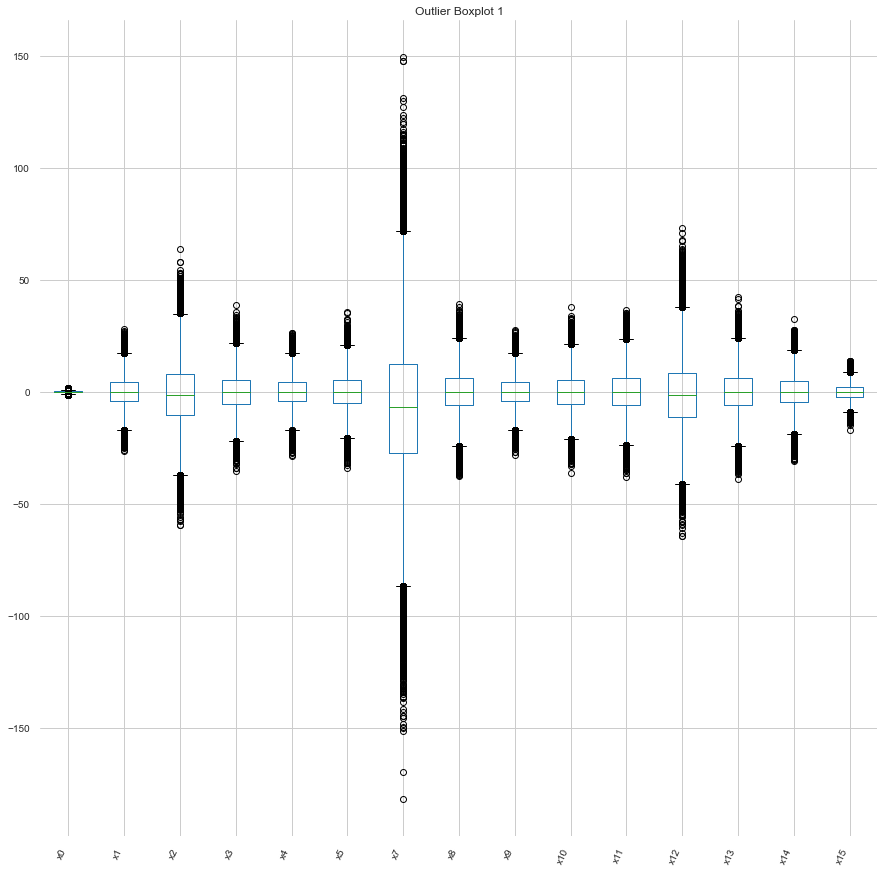

In [20]:
#boxplot of variables
plt.figure(figsize=(15, 15))
ax = Business_Data_ohe[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15']].boxplot()
ax.set_title('Outlier Boxplot 1')
chrt = ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')

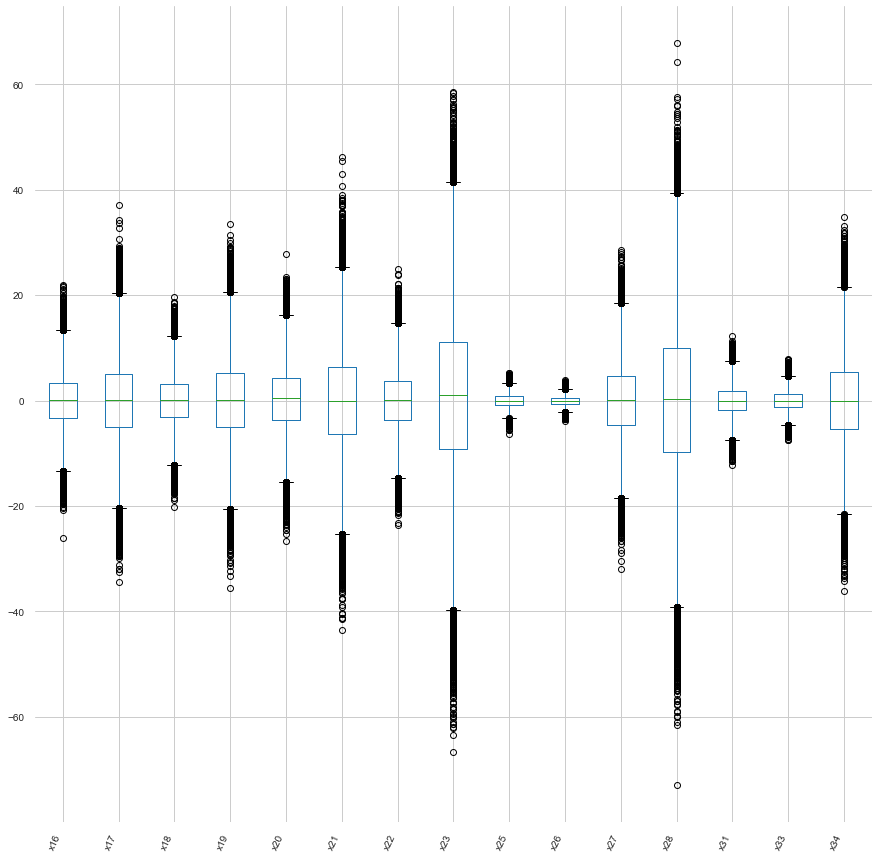

In [16]:
plt.figure(figsize=(15, 15))
ax = Business_Data_ohe[['x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x33', 'x34']].boxplot()
chrt = ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')

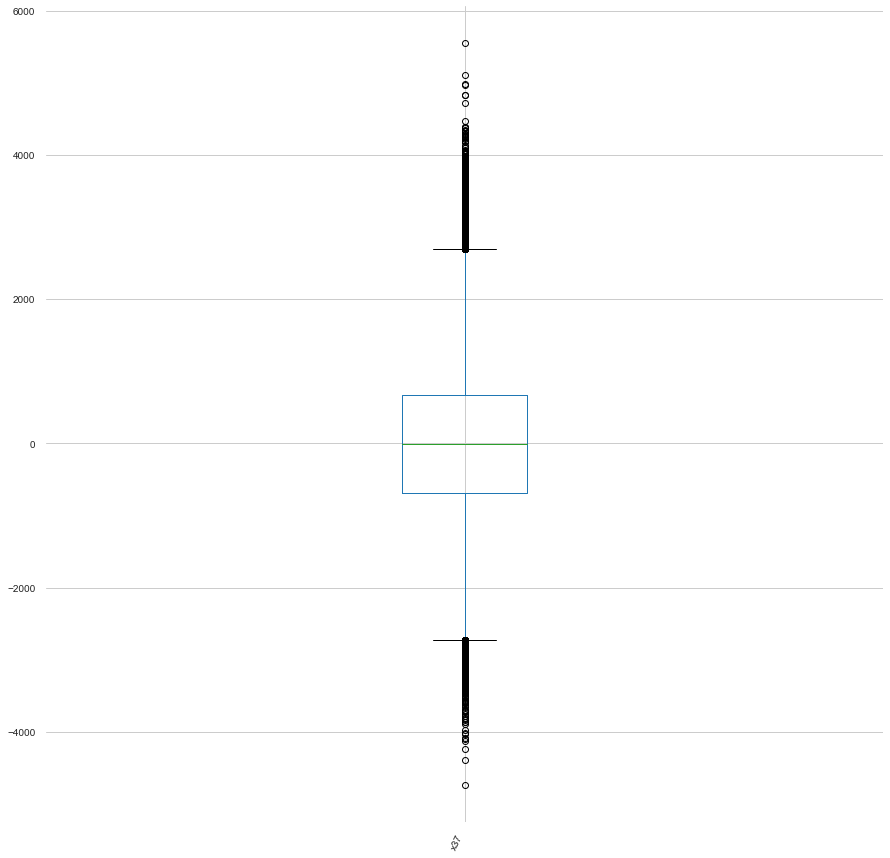

In [17]:
plt.figure(figsize=(15, 15))
ax = Business_Data_ohe[['x37']].boxplot()
chrt = ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')

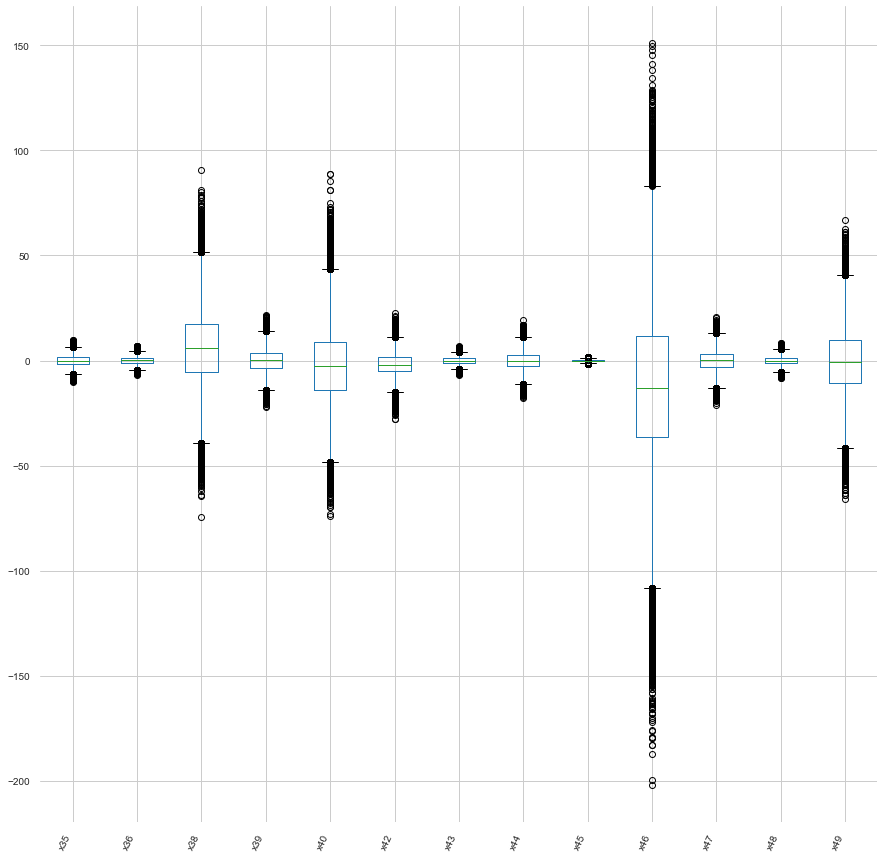

In [19]:
plt.figure(figsize=(15, 15))
ax = Business_Data_ohe[['x35', 'x36', 'x38', 'x39', 'x40', 'x42', 'x43', 'x44',
       'x45', 'x46', 'x47', 'x48', 'x49']].boxplot()
chrt = ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')

Reviewing the box plots above we see very little skewness in the data and they appear to be normally distributed.  

<span style="color:red"> How did we deal with Outliers? Unclear on whether the next sentence is true. Is the scaling of the data the way we dealt with it?<span/>

However, there are outliers that need to be addressed.

---
### Standardization - Scaling of the data

A pre-processing step applied to independent features in a dataset. Primarily it normalizes the data within a particular range; in this case, 0 to 1. It may also aid in accelerating the computations of an algorithm.

- *fit_transform* within MinMaxScaler() function fits the data and then transforms it.
---

In [26]:
# Assign the MinMaxScaler to the variable scaler
scaler = MinMaxScaler()

# Perform the scaling using the scaler
Business_Data_ohe_scaled = pd.DataFrame(scaler.fit_transform(Business_Data_ohe), columns=Business_Data_ohe.columns)

# Review the data post scaling
Business_Data_ohe_scaled.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32_-0.02%,x32_-0.03%,x32_-0.04%,x32_-0.05%,x32_0.0%,x32_0.01%,x32_0.02%,x32_0.03%,x32_0.04%,x32_0.05%
count,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,...,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000
mean,0.498395,0.484268,0.473770,0.476629,0.520278,0.487751,0.473779,0.525666,0.490752,0.505541,...,0.062021,0.010796,0.000857,0.000038,0.212045,0.254852,0.049918,0.005341,0.000344,0.000006
std,0.116206,0.116829,0.107960,0.108415,0.116644,0.110552,0.107965,0.092364,0.115988,0.114781,...,0.241195,0.103340,0.029260,0.006126,0.408758,0.435779,0.217777,0.072890,0.018544,0.002501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.419959,0.405735,0.400452,0.403659,0.441475,0.413356,0.400452,0.466303,0.412554,0.428507,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.498073,0.484334,0.472208,0.476525,0.520300,0.487755,0.472214,0.527888,0.490927,0.505554,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.576522,0.563162,0.547144,0.550157,0.598995,0.562359,0.547160,0.585873,0.568981,0.583199,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
### Balancing

Looking at the distribution of the outcomes (response variable) in our dataset, we can see that almost 60% of the data in our set has a response of "0" while the outcome 1 makes up 40%. When we run our classifier, we will need to be careful to account for the slightly unbalanced nature of our classifiers to help ensure we aren't overclassifying the majority labels.

![title](img/ResponseVariable.png)

We will address the balancing of the test and train datasets in our sampling below. We will split the test and train datasets by using the "stratify" option and will validate that they are balanced as part of the pre-processing of the data.


---
### Sampling
---

#### Train - Test Split

This technique provides us a way of voluntarily holding back part of the data to test whether the model works. If we use our entire dataset to train the model, then the model will always predict the correct category for any entry in the data set. This process of setting aside a part of the dataset voluntarily to evaluate the model stops the model from being too optimistic when predicting the outcome. Training the model on the entire data set could also lead to data snooping bias. This kind of bias results from refining too many parameters to improve the model's performance on a specific data set. In our analysis, we will split the data into training and test data sets (75:25) randomly. We will use the "stratify" option while splitting the data to ensure a well-balanced test and train set as regards the response variable or outcome.

Reference: https://towardsdatascience.com/3-things-you-need-to-know-before-you-train-test-split-869dfabb7e50

In [27]:
# Assign the Explanatory features and Response variable to variables X and y respectively  
X = Business_Data_ohe_scaled.drop(columns=['y'], axis=1)
y = Business_Data_ohe_scaled.y

In [28]:
# We split the data but use the stratify option to ensure a 
# balanced split of the outcome "y" across the test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

#### Check the ratio of the response variable in the Train-Test split to ensure it is balanced

Let's check the ratio of the response variable and compare it with that of the Train and Test dataset. The below results confirm that the ratio is retained and hence we can proceed with K-Fold Cross-Validation (CV) instead of Stratified K-Fold CV.

In [29]:
sum(Business_Data_ohe_scaled['y']==0)/sum(Business_Data_ohe_scaled['y']==1)

1.4925324270391618

In [30]:
sum(y_test==0)/sum(y_test==1)

1.4925791968071838

In [31]:
sum(y_train==0)/sum(y_train==1)

1.4925168371164879

---
# Baseline Models
---

### Establish the baseline model and Cost-Benefit matrix before tuning and optimizations

- Use the complete data set and select diverse models with default parameters.
- Establish a confusion matrix with classification results and model accuracy scores. 
- Create a custom function **confusion_mat** to capture, display and compare the confusion and classification results. 
- Use the true False Positives(FP) and False Negatives (FN) for the case counts to calculate the resulting business cost.

###  MODEL EVALUATION METRICS 
In order to evaluate the models, we reviewed several standard metrics, which are defined below. While the objective is to minimize cost impact, these metrics will also inform us about the models' performance. We aim to maximize our precision, recall, and accuracy scores in our models.

As noted, a confusion matrix shows how a particular model performs by summarizing True Positives, False Positives, True Negatives, and False Negatives. We are most concerned with False Negatives and False Positives, but the metrics will also be informative. 
- Accuracy: total number of correct predictions over total number of predictions made; (TP + TN)/(TP + FP + FN + TN)
- Precision: proportion of true positives over total number of positive outcomes, whether accurately predicted (TP) or inaccurately predicted (FP); (TP) / (TP + FP)
- Recall: proportion of positive outcomes that were correctly classified by model; (TP) / (TP + FN)

We further plotted ROC curves, also known as a Receiver Operation Characteristic Curve, to compare models based on the True Positive Rates (TPR) and False Positive Rates (FPR) for each classifier. An AUC (Area Under the Curve) score of 1.0 denotes a perfect classifier and an area of 0.5 represents a model which is no better than a random guess. Higher the AUC the better the classifier.

---

In [32]:
# Establish the default parameters for the models to be used below
rand_state = 101 # set a seed for reproducibility
n_iterations = 5

---
### K-fold Cross-Validation

- This statistical method is used to evaluate model generalization performance for future applicability.
- Provides greater stability and is more robust than using a simple split of a dataset into train and test sets.
- The algorithm splits the dataset multiple times training the model repeatedly on each of the splits.
- K-Fold divides the dataset into groups of equal sized samples (if possible), called folds.
- The prediction function uses these folds for learning, with the fold left out used for testing.

![title](img/KFoldCV.png) 

Reference: https://medium.com/the-owl/k-fold-cross-validation-in-keras-3ec4a3a00538

We adopted the K-Fold Cross-Validation approach for our analysis with the following parameters.

Parameters for k-fold CV:
- **n_splitsint** - Number of folds
    - Parameter selected: **5**
- **random_state** - random_state is the seed used by the random number generator
    - Parameter selected: **10**

In [33]:
# Establish the cross validation parameters to be used in the models
cv = KFold(n_splits=n_iterations, random_state=rand_state)

In [34]:
# Create a dataframe to capture the results of the baseline models below
results_df = pd.DataFrame(columns=['Classifier', 'Features', 'Accuracy', 'Parameters', 'Recall', 
                                   'Precision', 'FPR', 'TPR', 'AUC', 'True_Positives', 
                                   'True_Negatives', 'False_Positives', 'False_Negatives', 'Cost(1000s)'])

# Review the dataframe
results_df

# Create a reduced report of selected columns
results_df_reduced = results_df[['Classifier', 'Features', 'Parameters', 'Accuracy', 'Recall',
            'Precision', 'AUC', 'True_Positives', 'True_Negatives', 
            'False_Positives', 'False_Negatives', 'Cost(1000s)']].sort_values(by = 'Cost(1000s)')

In [35]:
# Create a custom function to create a confusion matrix and print the results of the base models
def confusion_mat(y_test, y_pred):
    print('----------------------------------------------------------')
    print('Confusion Matrix::\n')
    print(pd.crosstab(y_test, y_pred))
    print()
    print('Classification Report::')
    print(classification_report(y_test, y_pred))
    TN = pd.crosstab(y_test, y_pred).iloc[0, 0]
    FP = pd.crosstab(y_test, y_pred).iloc[0, 1]
    FN = pd.crosstab(y_test, y_pred).iloc[1, 0]
    TP = pd.crosstab(y_test, y_pred).iloc[1, 1]
    Cost = ((FP*10)+(FN*500))/1000
    Recall = recall_score(y_test, y_pred, average='weighted')
    Precision = precision_score(y_test, y_pred)
    Accuracy = accuracy_score(y_test, y_pred)
    return(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision)

In [36]:
# Create a classifier dictionary
clfsDict = {'Logistic Regression': LogisticRegression(solver = 'lbfgs', random_state=rand_state),
            'Gaussian Naive-Bayes': GaussianNB(),
            'Decision Tree': DecisionTreeClassifier(random_state=rand_state),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=rand_state),
            'XGB': XGBClassifier(random_state=rand_state)}

In [37]:
# Fit the baseline models and capture the performance metrics
start = time()

# Initialize a dataframe to capture the model stats
model_run_stats = []

# Loop through the models in the classifier dictionary
for mdl, clf in clfsDict.items():
    start_1 = time()
    acc = cross_val_score(clf,X,y=y,cv=cv)
    clf.fit(X_train, y_train)
    y_pred_full_data = clf.predict(X_test)
    y_pred_proba_full_data = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_full_data)
    auc = roc_auc_score(y_test, y_pred_proba_full_data)
    (FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_full_data)
    results_df = results_df.append({'Classifier':mdl
                                    , 'Features':'Full'
                                    , 'Parameters': 'Default'
                                    , 'Accuracy': Accuracy
                                    , 'Recall': Recall
                                    , 'Precision': Precision
                                    , 'FPR': fpr
                                    , 'TPR': tpr
                                    , 'AUC': auc
                                    , 'True_Positives': TP
                                    , 'True_Negatives': TN
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost(1000s)': Cost
                                   }
                                   , ignore_index=True
                                  )
    print()
    print('Process Time:: %0f' %(time()-start_1))
    print()
    
# get the feature importance from Random Forest and store in variable fi
    if mdl=='Random Forest':
        fi = pd.DataFrame(clf.feature_importances_,columns = ['featimp'])

# display the model stats
model_run_stats

print('Wall Time:: %0f' %(time()-start))

----------------------------------------------------------
Confusion Matrix::

col_0    0.0   1.0
y                 
0.0    20019  3916
1.0     7786  8250

Classification Report::
              precision    recall  f1-score   support

         0.0       0.72      0.84      0.77     23935
         1.0       0.68      0.51      0.59     16036

    accuracy                           0.71     39971
   macro avg       0.70      0.68      0.68     39971
weighted avg       0.70      0.71      0.70     39971


Process Time:: 15.906587

----------------------------------------------------------
Confusion Matrix::

col_0    0.0   1.0
y                 
0.0    19249  4686
1.0     7729  8307

Classification Report::
              precision    recall  f1-score   support

         0.0       0.71      0.80      0.76     23935
         1.0       0.64      0.52      0.57     16036

    accuracy                           0.69     39971
   macro avg       0.68      0.66      0.66     39971
weighted avg  

In [38]:
# Review the combined results of the baselining 
# using all features and default parameters
results_df_reduced

,Classifier,Features,Parameters,Accuracy,Recall,Precision,AUC,True_Positives,True_Negatives,False_Positives,False_Negatives,Cost(1000s)


# <span style="color:red"> Is it weird we show no results here?? I think we could get marked off since our Confusion Matrices don't have labels that explain what model <span/>

---
## Dimensionality Reduction (Feature Reduction)
---

In the provided dataset we have 50 explanatory features.  It is essential to understand and determine the importance of each feature in model contribution to enhance estimator results and improve performance. This is an important concept in machine learning and centered around simplicity and optimization.  Using the sklearn.feature_selection module that examines the classes, we can determine the features having the greatest impact and contribution to the selected models. 

Reference: https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15


### Benefits of Dimensionality reduction
- Contributes to increasing the goodness of fit metric - **R2**
- Aligns with the principle of **Occam's razor or the law of parsimony** - simpler is better and more likely to be correct
- Improve an estimators accuracy scores
- Boost performance especially on high-dimensional datasets

We used **Recursive Feature Elimination with Cross-Validation (RFECV)** to restrict the features used in the model.
Recursive feature elimination (RFE) selects features by recursively considering smaller and smaller sets of features by an external estimator based on the assignment of weights against the features (e.g. the coefficients of a linear model).
- Train the estimator on the baseline or complete set of features.
- Importance of each feature is determined by the coef_ attribute or a feature_importances_ attribute. 
- Least important features are trimmed from the original feature set.
- The process is recursively repeated on the trimmed dataset until the optimal features desired are reached.


### Parameters for RFECV: 
RFECV performs RFE in a cross-validation loop to identify the optimal features.
- **estimator**: A supervised learning estimator with a fit method that provides information about feature importance.
    - Parameter selected: **RandomForestClassifier**
    
    
- **step** - If greater than or equal to 1, then step corresponds to the number of features to remove at each iteration.
    - Parameter selected: **4**
    
    
- **cv**: Determines the cross-validation splitting strategy. Integer value specifies the number of folds.
    - Parameter selected: **3**
    
    
- **scoring**: A scoring method to determine which score to maximize.
    - Parameter selected: **recall**

---
### Feature Importance Plots

# <span style="color:red"> Joe - Does it make sense to just list and plot the top features versus plotting all the features - Thoughts? </span>

[Text(0, 0, 'x23'),
 Text(0, 0, 'x20'),
 Text(0, 0, 'x49'),
 Text(0, 0, 'x48'),
 Text(0, 0, 'x42'),
 Text(0, 0, 'x12'),
 Text(0, 0, 'x28'),
 Text(0, 0, 'x37'),
 Text(0, 0, 'x27'),
 Text(0, 0, 'x40'),
 Text(0, 0, 'x7'),
 Text(0, 0, 'x41'),
 Text(0, 0, 'x46'),
 Text(0, 0, 'x38'),
 Text(0, 0, 'x2'),
 Text(0, 0, 'x6'),
 Text(0, 0, 'x33'),
 Text(0, 0, 'x31'),
 Text(0, 0, 'x3'),
 Text(0, 0, 'x39'),
 Text(0, 0, 'x43'),
 Text(0, 0, 'x26'),
 Text(0, 0, 'x19'),
 Text(0, 0, 'x47'),
 Text(0, 0, 'x15'),
 Text(0, 0, 'x17'),
 Text(0, 0, 'x8'),
 Text(0, 0, 'x9'),
 Text(0, 0, 'x5'),
 Text(0, 0, 'x25'),
 Text(0, 0, 'x13'),
 Text(0, 0, 'x35'),
 Text(0, 0, 'x16'),
 Text(0, 0, 'x45'),
 Text(0, 0, 'x36'),
 Text(0, 0, 'x22'),
 Text(0, 0, 'x14'),
 Text(0, 0, 'x4'),
 Text(0, 0, 'x0'),
 Text(0, 0, 'x11'),
 Text(0, 0, 'x18'),
 Text(0, 0, 'x10'),
 Text(0, 0, 'x34'),
 Text(0, 0, 'x1'),
 Text(0, 0, 'x21'),
 Text(0, 0, 'x44'),
 Text(0, 0, 'x32_0.0%'),
 Text(0, 0, 'x30_Wed'),
 Text(0, 0, 'x32_-0.01%'),
 Text(0, 0, 'y

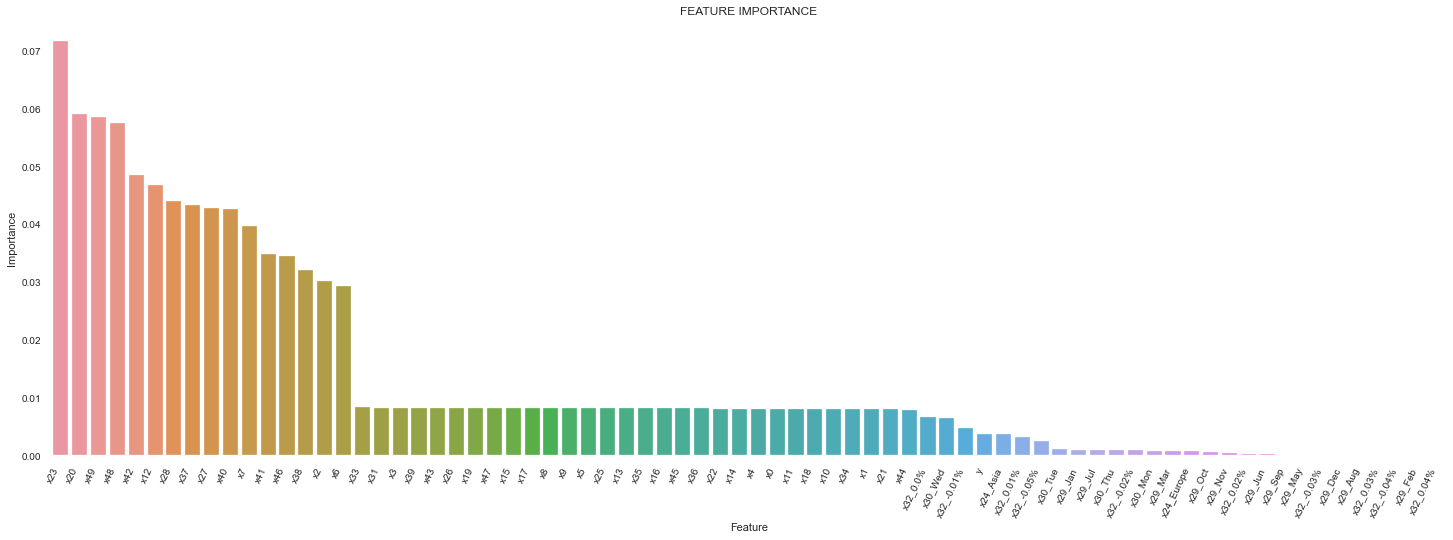

In [39]:
# Merge field names and feature importance to display them together
featuresnames = pd.DataFrame(Business_Data_ohe_scaled.columns.values.tolist(), columns =['fields'])
featimpdf = pd.merge(featuresnames, fi, left_index=True, right_index=True)
featimpdf = featimpdf.sort_values(by='featimp', ascending=False)
featimpdf

# Plot the feature importance
plt.figure(figsize=(25,8))
ax = sns.barplot(x=featimpdf.fields, y=featimpdf.featimp)
ax.set_title('FEATURE IMPORTANCE')
plt.xlabel("Feature")
plt.ylabel("Importance")
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')

In [40]:
# Establish the parameters for RFECV using the Random Forest estimator
start = time()
clf = RandomForestClassifier(n_estimators=100, random_state=rand_state)
selector = RFECV(estimator=clf, step = 4, cv=3, scoring='recall')

feature_fit = selector.fit(X_train, y_train)

print()
print('Process Time:: %0f' %(time()-start_1))
print()

print('Optimal number of features : ', feature_fit.n_features_)
print('Best features : ', X_train.columns[selector.support_])

print('Wall Time:: %0f' %(time()-start))


Process Time:: 4092.564940

Optimal number of features :  14
Best features :  Index(['x7', 'x12', 'x20', 'x23', 'x27', 'x28', 'x37', 'x38', 'x40', 'x41',
       'x42', 'x46', 'x48', 'x49'],
      dtype='object')
Wall Time:: 3852.922517


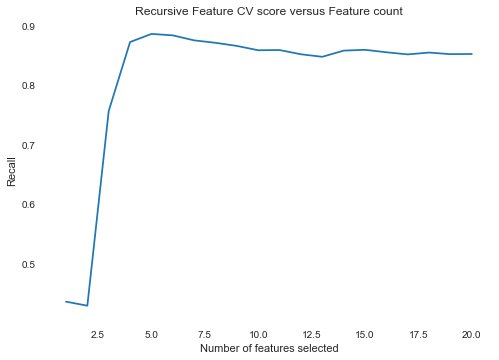

In [41]:
# Plot features selected against the model score
plt.figure()
plt.title('Recursive Feature CV score versus Feature count')
plt.xlabel("Number of features selected")
plt.ylabel("Recall")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

The RFECV process identified the following features as being the most important and best in contributing to the predictive modeling.  

The most important features are:

###  'x7',  'x12',	 'x20',	 'x23',  'x27',	 'x28',	 'x37',  'x38',  'x40',  'x41',	 'x42',	 'x46',	 'x48',  'x49'

#### The business should pay greater attention to these features given their importance and adopt appropriate strategies.


In [42]:
# Set the training and test sets using just the reduced features 
# identified from the RFECV operation conducted above
X_train_reduced_features = X_train[X_train.columns[selector.support_]]
X_test_reduced_features = X_test[X_test.columns[selector.support_]]

In [43]:
# Review the reduced features for the training data
X_train_reduced_features.head(2)

,x7,x12,x20,x23,x27,x28,x37,x38,x40,x41,x42,x46,x48,x49
111388,0.657971,0.281545,0.472484,0.491509,0.435731,0.562543,0.408573,0.339018,0.505676,0.339018,0.496146,0.515682,0.376154,0.598723
12173,0.411950,0.497442,0.531038,0.568124,0.435274,0.261336,0.653271,0.459207,0.291930,0.459207,0.466451,0.729740,0.317857,0.518080


In [44]:
# Review the reduced features for the testing data
X_test_reduced_features.head(2)

,x7,x12,x20,x23,x27,x28,x37,x38,x40,x41,x42,x46,x48,x49
21641,0.460818,0.584121,0.598260,0.484890,0.474755,0.379415,0.422200,0.389242,0.339239,0.389242,0.421575,0.593851,0.451735,0.484480
62199,0.402165,0.380945,0.566999,0.499279,0.809338,0.320265,0.369598,0.394540,0.497222,0.394540,0.453576,0.569587,0.352952,0.380788


---
## Train the models using the reduced features
---

Using default parameters to establish a baseline with reduced features before proceeding to the **parameter tuning phase** using a **Randomized Grid Search** approach.

### Decision Tree Classifier

Decision trees are primarily leveraged to address both regression and classification cases. 
- **Classification tree models are used to predict a qualitative response**
- **Regression tree models are used to predict a quantitative response**

The algorithm constructs a tree using a training dataset where each node is an attribute and the branches are the corresponding values.

---

In [45]:
# Initialize the DECISION TREE classifier 
clf_DT_default = DecisionTreeClassifier(random_state=rand_state)

# Fit the model
clf_DT_default.fit(X_train_reduced_features, y_train)

# Do the prediction and capture the error/performance metrics
y_pred = clf_DT_default.predict(X_test_reduced_features)
y_pred_proba = clf_DT_default.predict_proba(X_test_reduced_features)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred)

# Append the results to the "results_df" dataframe for compare and contrast
results_df = results_df.append({'Classifier':'Decision Tree'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Default'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost(1000s)': Cost
                                }
                                , ignore_index=True
                               )

----------------------------------------------------------
Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    21091   2844
1.0     2882  13154

Classification Report::
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     23935
         1.0       0.82      0.82      0.82     16036

    accuracy                           0.86     39971
   macro avg       0.85      0.85      0.85     39971
weighted avg       0.86      0.86      0.86     39971



---
### Random Forest Classifier

Random Forests are primarily based on Decision trees. 
- Are an ensemble of decision trees trained using the bagging methodology. 
- Leverages randomness when growing trees rather than just searching for the best feature when splitting a node.
- Seeks the best feature among a random subset of features. 
- Delivers an enhanced model by trading higher bias for lower variance. 

Random Forests are useful in gaining a good understanding of feature importance especially when performing feature selection.

---

In [46]:
# Initialize the RANDOM FOREST classifier 
clf_RF_default = RandomForestClassifier(random_state=rand_state)

# Fit the model
clf_RF_default.fit(X_train_reduced_features, y_train)

# Do the prediction and capture the error/performance metrics
y_pred = clf_RF_default.predict(X_test_reduced_features)
y_pred_proba = clf_RF_default.predict_proba(X_test_reduced_features)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred)

# Append the results to the "results_df" dataframe for compare and contrast
results_df = results_df.append({'Classifier':'Random Forest'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Default'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost(1000s)': Cost
                               }
                               , ignore_index=True
                              )

----------------------------------------------------------
Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    22883   1052
1.0     1725  14311

Classification Report::
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     23935
         1.0       0.93      0.89      0.91     16036

    accuracy                           0.93     39971
   macro avg       0.93      0.92      0.93     39971
weighted avg       0.93      0.93      0.93     39971



---
### XGBoost Classifier

XGBoost is an optimized distributed gradient boosting library designed for high efficiency, flexibility and portability. 
- Machine learning algorithms are deployed leveraging the Gradient Boosting framework. 
- It provides a parallel tree boosting approach (GBDT, GBM) which is fast and accurate for solving data science problems. 

In [47]:
# Initialize the XGBOOST Classifier
clf_XGB_default = XGBClassifier(random_state=rand_state)

# Fit the model
clf_XGB_default.fit(X_train_reduced_features, y_train)

# Do the prediction and capture the error/performance metrics
y_pred = clf_XGB_default.predict(X_test_reduced_features)
y_pred_proba = clf_XGB_default.predict_proba(X_test_reduced_features)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred)

# Append the results to the "results_df" dataframe for compare and contrast
results_df = results_df.append({'Classifier':'XGB'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Default'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost(1000s)': Cost
                               }
                               , ignore_index=True
                              )

----------------------------------------------------------
Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    22580   1355
1.0     1636  14400

Classification Report::
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     23935
         1.0       0.91      0.90      0.91     16036

    accuracy                           0.93     39971
   macro avg       0.92      0.92      0.92     39971
weighted avg       0.93      0.93      0.93     39971



In [48]:
# Review the combined results matrix
results_df_reduced

,Classifier,Features,Parameters,Accuracy,Recall,Precision,AUC,True_Positives,True_Negatives,False_Positives,False_Negatives,Cost(1000s)


---
## RandomizedSearchCV to choose best parameters
---

In RandomizedSearchCV all hyperparameter values are not tested. Instead, a fixed number of hyperparameter settings are sampled from specified probability distributions.

### Options for RandomizedSearchCV
- estimator - A object of that type is instantiated for each grid point
    - Assigned as per algorithm being tuned
    
    
- param_distributions - Dictionary with parameters names (string) as keys and distributions or lists of parameters to try
    - Assigned as per algorithm being tuned
    
    
- scoring - A single string to evaluate the predictions on the test set
    - Parameter setting: **['precision' , 'recall' , 'accuracy']**
    
    
- cv - Determines the cross-validation splitting strategy
    - Parameter setting: **5**
    
    
- refit - Refit an estimator using the best found parameters on the whole dataset
    - Parameter setting: **recall**
    
    
- n_iterint - Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution
    - Parameter setting: **10**

In [49]:
# Initialize the "scores" variable with metrics
scores = ['precision'
          , 'recall'
          , 'accuracy'
         ]

# Review the variable
print(scores)

['precision', 'recall', 'accuracy']


In [50]:
# Define a custom function to capture the performance metrics
def report_perf(clf, n_top = 3, clf_name = "", verbose=True):
    if(verbose):
        for n in range(1, n_top+1):
            candidates = np.flatnonzero(clf.cv_results_['rank_test_recall'] == n)
            for candidate in candidates:
                print('Model with rank: {0}'.format(n))
                print('Mean validation score (Recall on Test): {0:.3f} (std: {1:.3f})'.format(
                    clf.cv_results_['mean_test_recall'][candidate], clf.cv_results_['std_test_recall'][candidate]))
                print('ParametersL {0}',format(clf.cv_results_['params'][candidate]))
    return{'Classifier': clf_name
           , 'Best_Parameters': str(clf.best_params_)
           , 'Best_Estimator': str(clf.best_estimator_)
           , 'Precision_Mean':clf.cv_results_['mean_test_precision'][clf.best_index_]
           , 'Precision_std':clf.cv_results_['std_test_precision'][clf.best_index_]
           , 'Recall_Mean':clf.cv_results_['mean_test_recall'][clf.best_index_]
           , 'Recall_std':clf.cv_results_['std_test_recall'][clf.best_index_]
          }

---
### Decision Tree

Tuning the *Decision Tree Classifier*:
- max_depth: The maximum depth of the tree.
    - Parameter setting: **[10, 20, 30, None]**
    
    
- max_features: The number of features to consider when looking for the best split
    - Parameter setting: **['auto', 'sqrt']**
    
    
- criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
    - Parameter setting: **['gini','entropy']**
    
    
- min_samples_leaf: The minimum number of samples required to be at a leaf node.  
    - Parameter setting: **[1, 2, 4]**
    
    
- min_samples_split: The minimum number of samples required to split an internal node
    - Parameter setting: **[2, 5, 10]**
    
    
- random_state - If int, random_state is the seed used by the random number generator
    - Parameter setting: **10**

In [51]:
# Initialize the Decision Tree Classifier
clf_DT = DecisionTreeClassifier(random_state=rand_state)

# Set the tuning parameters
tuned_parameters_DT={'max_depth': [10, 20, 30, None]
                     , 'max_features': ['auto', 'sqrt']
                     , 'criterion':['gini','entropy']
                     , 'min_samples_leaf': [1, 2, 4]
                     , 'min_samples_split': [2, 5, 10]
                    }

random_search_DT = RandomizedSearchCV(estimator=clf_DT
                                      , param_distributions=tuned_parameters_DT
                                      , cv = 5
                                      , scoring = scores
                                      , refit ='recall'
                                      , n_iter=10
                                     )

# Run the RandomizedSearchCV for the Classifier
random_search_DT.fit(X_train_reduced_features, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=101,
           

In [52]:
# Capture the performance metrics for the Decision Tree tuning
DT_report = report_perf(random_search_DT, n_top = 3, clf_name='Decision_Tree')

# Display the report
DT_report

Model with rank: 1
Mean validation score (Recall on Test): 0.794 (std: 0.008)
ParametersL {0} {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}
Model with rank: 2
Mean validation score (Recall on Test): 0.788 (std: 0.004)
ParametersL {0} {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}
Model with rank: 3
Mean validation score (Recall on Test): 0.788 (std: 0.008)
ParametersL {0} {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy'}


{'Classifier': 'Decision_Tree',
 'Best_Parameters': "{'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}",
 'Best_Estimator': "DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',\n                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=10,\n                       min_weight_fraction_leaf=0.0, presort='deprecated',\n                       random_state=101, splitter='best')",
 'Precision_Mean': 0.8215580804786354,
 'Precision_std': 0.0030117029435736044,
 'Recall_Mean': 0.7939013794285439,
 'Recall_std': 0.0075226614140572}

---
### Random Forest

Tuning the parameters for the *Random Forest Classifier:
- n_estimators: The number of trees in the forest.
    - Parameter setting: **[100, 200]**
    
    
- max_depth: The maximum depth of the tree.
    - Parameter setting: **[25, 50, None]**
    
    
- criterion: function to measure the quality of a split. Supported criteria are "gini" for Gini impurity and "entropy" for information gain.
    - Parameter setting: **['gini','entropy']**
    
    
- min_samples_leaf: The minimum number of samples required to be at a leaf node.
    - Parameter setting: **[1, 25, 50]**
    
    
- max_features: The number of features to consider when looking for the best split.
    - Parameter setting: **[.2, .3, 'auto']**
    
    
- min_samples_split: The minimum number of samples required to split an internal node.
    - Parameter setting: **[2, 4, 8, 10, 12]**

In [53]:
# Initialize the Random Forest Classifier
clf_RF = RandomForestClassifier(random_state=rand_state)

# Set the tuning parameters
tuned_parameters_RF={'n_estimators':[100, 200]
                     , 'max_depth':[25, 50, None]
                     , 'criterion':['gini','entropy']
                     , 'min_samples_leaf': [1, 25, 50]
                     , 'max_features':[.2, .3, 'auto']
                     , 'min_samples_split':[2, 4, 8, 10, 12]
                    }

random_search_RF = RandomizedSearchCV(estimator=clf_RF
                                      , param_distributions=tuned_parameters_RF
                                      , cv = 5
                                      , scoring = scores
                                      , refit = 'recall'
                                      , n_iter=10
                                     )

# Run the RandomizedSearchCV for the Classifier
random_search_RF.fit(X_train_reduced_features, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [54]:
# Capture the performance metrics for the Random Forest tuning
RF_report = report_perf(random_search_RF, n_top = 3, clf_name='Random_Forest')

# Display the report
RF_report

Model with rank: 1
Mean validation score (Recall on Test): 0.898 (std: 0.002)
ParametersL {0} {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.3, 'max_depth': None, 'criterion': 'entropy'}
Model with rank: 2
Mean validation score (Recall on Test): 0.892 (std: 0.003)
ParametersL {0} {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.2, 'max_depth': 50, 'criterion': 'entropy'}
Model with rank: 3
Mean validation score (Recall on Test): 0.886 (std: 0.003)
ParametersL {0} {'n_estimators': 200, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 0.2, 'max_depth': None, 'criterion': 'entropy'}


{'Classifier': 'Random_Forest',
 'Best_Parameters': "{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.3, 'max_depth': None, 'criterion': 'entropy'}",
 'Best_Estimator': "RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n                       criterion='entropy', max_depth=None, max_features=0.3,\n                       max_leaf_nodes=None, max_samples=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, n_estimators=200,\n                       n_jobs=None, oob_score=False, random_state=101,\n                       verbose=0, warm_start=False)",
 'Precision_Mean': 0.9329361920880934,
 'Precision_std': 0.0024077105849572736,
 'Recall_Mean': 0.898125087133691,
 'Recall_std': 0.0022644489577372394}

---
### XGBoost Classifier

Tuning the parameters for XGBoost:
- n_estimators: Number of gradient boosted trees. Equivalent to number of boosting rounds.
    - Parameter setting: **[100, 150, 1000]**
    
    
- learning_rate: Boosting learning rate (xgb’s “eta”)
    - Parameter setting: **[0.01, 0.6, None]**
    
    
- subsample: Subsample ratio of the training instances.
    - Parameter setting: **[0.3, 0.9, None]**
    
    
- max_depth: Maximum depth of a tree.
    - Parameter setting: **[3, 4, 5, 6, 7, 8, 9, None]**
    
    
- colsample_bytree: The subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
    - Parameter setting: **[0.5, 0.9, None]**
    
    
- min_child_weight: Minimum sum of instance weight (hessian) needed in a child.
    - Parameter setting: **[1, 2, 3, 4, None]**

In [55]:
# Initialize the XGBoost Classifier
clf_XGB = XGBClassifier(random_state=rand_state)

# Set the tuning parameters
tuned_parameters_XGB={'n_estimators': [100, 150, 1000]
                      , 'learning_rate': [0.01, 0.6, None]
                      , 'subsample': [0.3, 0.9, None]
                      , 'max_depth': [3, 4, 5, 6, 7, 8, 9, None]
                      , 'colsample_bytree': [0.5, 0.9, None]
                      , 'min_child_weight': [1, 2, 3, 4, None]
                     }

random_search_XGB = RandomizedSearchCV(estimator=clf_XGB
                                      , param_distributions=tuned_parameters_XGB
                                      , cv = 5
                                      , scoring = scores
                                      , refit ='recall'
                                      , n_iter=10
                                     )
# Run the RandomizedSearchCV for the XGBoost Classifier
random_search_XGB.fit(X_train_reduced_features, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.5, 0.9, None],
                                        '

In [56]:
# Capture the performance metrics for the XGBoost tuning
XGB_report = report_perf(random_search_XGB, n_top = 3, clf_name='XGBoost')

# Display the report
XGB_report

Model with rank: 1
Mean validation score (Recall on Test): 0.916 (std: 0.004)
ParametersL {0} {'subsample': None, 'n_estimators': 150, 'min_child_weight': 2, 'max_depth': 8, 'learning_rate': None, 'colsample_bytree': 0.9}
Model with rank: 2
Mean validation score (Recall on Test): 0.904 (std: 0.003)
ParametersL {0} {'subsample': None, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.6, 'colsample_bytree': 0.5}
Model with rank: 3
Mean validation score (Recall on Test): 0.894 (std: 0.002)
ParametersL {0} {'subsample': None, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.6, 'colsample_bytree': 0.9}


{'Classifier': 'XGBoost',
 'Best_Parameters': "{'subsample': None, 'n_estimators': 150, 'min_child_weight': 2, 'max_depth': 8, 'learning_rate': None, 'colsample_bytree': 0.9}",
 'Best_Estimator': "XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.300000012, max_delta_step=0, max_depth=8,\n              min_child_weight=2, missing=nan, monotone_constraints='()',\n              n_estimators=150, n_jobs=0, num_parallel_tree=1,\n              objective='binary:logistic', random_state=101, reg_alpha=0,\n              reg_lambda=1, scale_pos_weight=1, subsample=1,\n              tree_method='exact', validate_parameters=1, verbosity=None)",
 'Precision_Mean': 0.9304915296094689,
 'Precision_std': 0.0020934980870729184,
 'Recall_Mean': 0.9162924646643649,
 'Recall_std': 0.0035141997163698558}

### Append random_state to the best parameters

Assign the best parameters from each Random Search model to a variable and add the random state parameter to it. These variables are then used to train the models with **reduced features and best parameters**.

In [57]:
DT_best_params = random_search_DT.best_params_
DT_best_params['random_state'] = rand_state

RF_best_params = random_search_RF.best_params_
RF_best_params['random_state'] = rand_state

XGB_best_params = random_search_XGB.best_params_
XGB_best_params['random_state'] = rand_state

---
## Train the models with Reduced Features and Best Parameters
---

### Decision Tree (reduced features and best parameters)
- The best parameter (with random_state) from the previous step is chosen as classifier
- Confusion Matrix and Classification Reports are displayed 

In [58]:
# Initialize the Classifier using the best parameters from the Grid Search
clf_DT_best = DecisionTreeClassifier(**DT_best_params)

# Fit the model
clf_DT_best.fit(X_train_reduced_features, y_train)

# Predict and capture the predictions
y_pred_DT = clf_DT_best.predict(X_test_reduced_features)

# Capture the prediction probability of the outcome
y_pred_proba = clf_DT_best.predict_proba(X_test_reduced_features)[:, 1]

# Capture all model evaluation metrics
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_DT)

# Save the results to the results dataframe
results_df = results_df.append({'Classifier':'Decision Tree'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Best'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost(1000s)': Cost
                               }
                               , ignore_index=True
                              )

----------------------------------------------------------
Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    21107   2828
1.0     3209  12827

Classification Report::
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     23935
         1.0       0.82      0.80      0.81     16036

    accuracy                           0.85     39971
   macro avg       0.84      0.84      0.84     39971
weighted avg       0.85      0.85      0.85     39971



### Random Forest (reduced features and best parameters)
- The best estimator from the previous step is chosen as classifier
- Confusion Matrix and Classification Reports are displayed 

In [59]:
# Initialize the Classifier using the best parameters from the Grid Search
clf_RF_best = RandomForestClassifier(**RF_best_params)

# Fit the model
clf_RF_best.fit(X_train_reduced_features, y_train)

# Predict and capture the predictions
y_pred_RF = clf_RF_best.predict(X_test_reduced_features)

# Capture the prediction probability of the outcome
y_pred_proba = clf_RF_best.predict_proba(X_test_reduced_features)[:, 1]

# Capture all model evaluation metrics
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_RF)

# Save the results to the results dataframe
results_df = results_df.append({'Classifier':'Random Forest'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Best'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost(1000s)': Cost
                               }
                               , ignore_index=True
                              )

----------------------------------------------------------
Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    22880   1055
1.0     1587  14449

Classification Report::
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     23935
         1.0       0.93      0.90      0.92     16036

    accuracy                           0.93     39971
   macro avg       0.93      0.93      0.93     39971
weighted avg       0.93      0.93      0.93     39971



### XGBoost (reduced features and best parameters)
- The best estimator from the previous step is chosen as classifier
- Confusion Matrix and Classification Reports are displayed 

In [60]:
# Initialize the Classifier using the best parameters from the Grid Search
clf_XGB_Best = XGBClassifier(**XGB_best_params)

# Fit the model
clf_XGB_Best.fit(X_train_reduced_features, y_train)

# Predict and capture the predictions
y_pred_XGB = clf_XGB_Best.predict(X_test_reduced_features)

# Capture the prediction probability of the outcome
y_pred_proba = clf_XGB_Best.predict_proba(X_test_reduced_features)[:, 1]

# Capture all model evaluation metrics
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_XGB)

# Save the results to the results dataframe
results_df = results_df.append({'Classifier':'XGB'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Best'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost(1000s)': Cost
                               }
                               , ignore_index=True
                              )

----------------------------------------------------------
Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    22814   1121
1.0     1332  14704

Classification Report::
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     23935
         1.0       0.93      0.92      0.92     16036

    accuracy                           0.94     39971
   macro avg       0.94      0.94      0.94     39971
weighted avg       0.94      0.94      0.94     39971



In [61]:
# Review the results after running the models 
# with reduced features and the "best" parameters
results_df_reduced

,Classifier,Features,Parameters,Accuracy,Recall,Precision,AUC,True_Positives,True_Negatives,False_Positives,False_Negatives,Cost(1000s)


## Ensemble Models

The goal of ensemble methods is to combine the predictions of several base estimators in order to improve generalizability and robustness versus a single estimator.

Stacking, also called Super Learning or Stacked Regression, is a class of algorithms that involves training a second-level "metalearner" to find the optimal combination of the base learners. Unlike bagging and boosting, the goal in stacking is to ensemble strong and diverse sets of learners together.

![title](img/EnsembleModels3.png) 

References: https://www.kdnuggets.com/2019/01/ensemble-learning-5-main-approaches.html


### Ensemble Model 1 - Stacking

In this ensemble technique we leverage the vecstack package for stacking. It is compatible with the scikit-learn API to automate OOF computation, prediction and bagging using multiple models and stages.

![title](img/EnsembleModels.png) 

Reference: https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/

We use the "BEST" Decision Tree and Random Forest classifiers from above in Stage 1. Stage 1 output is then passed on to Stage 2 which uses the XGBoost classifier with the best parameters. Finally, Logistic Regression is used as the Meta Classifier to predict the outcome and compare against the test dataset. 

In [62]:
#-------------------------------------------------------
# Initialize Level-1 models
#-------------------------------------------------------
models_1 = [clf_DT_best
            , clf_RF_best]

# Get out-of-fold predictions from Level-1 models
S_1_train, S_1_test = stacking(models_1
                               , X_train_reduced_features
                               , y_train
                               , X_test_reduced_features
                               , regression = True
                               , metric=recall_score
                               , verbose = 2)

#-------------------------------------------------------
# Initialize Level-2 models
#-------------------------------------------------------
models_2 = [clf_XGB_Best]

# Get out-of-fold predictions from Level-2 models
S_2_train, S_2_test = stacking(models_2
                               , S_1_train
                               , y_train
                               , S_1_test
                               , regression = True
                               , metric=recall_score
                               , verbose = 2)

#-------------------------------------------------------
# Initialize the Level-3 model
#-------------------------------------------------------
model = LogisticRegression(random_state=rand_state)

# Fit
model.fit(S_2_train, y_train)

# Get final prediction
y_pred_ensemble = model.predict(S_2_test)

#-------------------------------------------------------
model.predict_proba(S_2_test)

task:         [regression]
metric:       [recall_score]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [DecisionTreeClassifier]
    fold  0:  [0.79231350]
    fold  1:  [0.78845040]
    fold  2:  [0.79195585]
    fold  3:  [0.79958831]
    ----
    MEAN:     [0.79307702] + [0.00405100]
    FULL:     [0.79309055]

model  1:     [RandomForestClassifier]
    fold  0:  [0.89670219]
    fold  1:  [0.89542484]
    fold  2:  [0.89514173]
    fold  3:  [0.89814739]
    ----
    MEAN:     [0.89635404] + [0.00119063]
    FULL:     [0.89635819]

task:         [regression]
metric:       [recall_score]
mode:         [oof_pred_bag]
n_models:     [1]

model  0:     [XGBClassifier]
    fold  0:  [0.89670219]
    fold  1:  [0.89542484]
    fold  2:  [0.89514173]
    fold  3:  [0.89814739]
    ----
    MEAN:     [0.89635404] + [0.00119063]
    FULL:     [0.89635819]



array([[0.93228059, 0.06771941],
       [0.93228059, 0.06771941],
       [0.06683825, 0.93316175],
       ...,
       [0.06683825, 0.93316175],
       [0.06683825, 0.93316175],
       [0.93228059, 0.06771941]])

In [63]:
# Save the results to the results dataframe
y_pred_proba = model.predict_proba(S_2_test)[:, 1]

# Capture all model evaluation metrics
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_ensemble)

# Save the results to the results dataframe
results_df = results_df.append({'Classifier':'Ensemble_1'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Best'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost(1000s)': Cost
                               }
                               , ignore_index=True
                              )

----------------------------------------------------------
Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    22794   1141
1.0     1560  14476

Classification Report::
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     23935
         1.0       0.93      0.90      0.91     16036

    accuracy                           0.93     39971
   macro avg       0.93      0.93      0.93     39971
weighted avg       0.93      0.93      0.93     39971



In [64]:
# Display the recall score of the Ensemble 1 Classifier
recall_score(y_test, y_pred_ensemble)

0.9027188825143427

### Ensemble Model 2 - StackingCVClassifier

The second ensemble technique uses the StackingCVClassifier from the mlxtend package. 

![title](img/Ensemble_StackingCVClassifier.png) 

Reference: http://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/

In this model, we pass all our 3 best models (Decision Tree, Random Forest and XGBoost) together in Stage 1. Similar to the previous ensemble model, we use Logistic Regression as our Meta-Classifier.

In [65]:
# Initialize the Ensemble 2 Classifier using the diverse models
sclf = StackingCVClassifier(classifiers=[clf_DT_best, clf_RF_best, clf_XGB_Best]
                            , use_probas=True
                            , random_state= rand_state
                            , meta_classifier=LogisticRegression(random_state=rand_state))

# Initialize variables to hold the labels and classifiers
label = ['Decision Tree', 'Random Forest', 'XGBoost', 'Stacking Classifier']
clf_list = [clf_DT_best, clf_RF_best, clf_XGB_Best, sclf]

# Fit the model
sclf.fit(X_train_reduced_features, y_train)

StackingCVClassifier(classifiers=[DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=20,
                                                         max_features='sqrt',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         ra

In [66]:
# Predict and capture the predictions
y_pred_sclf = sclf.predict(X_test_reduced_features)

# Capture the prediction probability of the outcome
y_pred_proba = sclf.predict_proba(X_test_reduced_features)[:, 1]

# Capture all model evaluation metrics
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_sclf)

# Save the results to the results dataframe
results_df = results_df.append({'Classifier':'Ensemble_2'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Best'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost(1000s)': Cost
                               }
                               , ignore_index=True
                              )

----------------------------------------------------------
Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    22835   1100
1.0     1276  14760

Classification Report::
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     23935
         1.0       0.93      0.92      0.93     16036

    accuracy                           0.94     39971
   macro avg       0.94      0.94      0.94     39971
weighted avg       0.94      0.94      0.94     39971



### Ensemble Model 3 

Stack of estimators with a final classifier. Stacked generalization consists of stacking the output of individual estimators and using a classifier to compute the final prediction. Stacking leverages the strength of each individual estimator by using their outputs as input to the final estimator.

![title](img/StackOfEstimatorsWithFinalClassifier.png)

Reference: https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840


In this step, we use multi-layer classifier technique. In this technique, we assign the final estimator to a stacking classifier.

In [67]:
#-------------------------------------------------------
# Initialize the final layer
#-------------------------------------------------------
final_layer = StackingClassifier(estimators=[('rf', clf_RF_best)
                                            , ('xgb', clf_XGB_Best)]
                                , final_estimator=LogisticRegression(random_state=rand_state)
                               )

#-------------------------------------------------------
# Initialize the multi-layer
#-------------------------------------------------------
multi_layer_regressor = StackingClassifier(estimators=[('dt', clf_DT_best)]
                                          , final_estimator=final_layer
                                         )

# Fit the model
multi_layer_regressor.fit(X_train_reduced_features, y_train)

StackingClassifier(cv=None,
                   estimators=[('dt',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=20,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=10,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                 

In [68]:
# Predict and capture the predictions
y_pred_multi = multi_layer_regressor.predict(X_test_reduced_features)

# Capture the prediction probability of the outcome
y_pred_proba = multi_layer_regressor.predict_proba(X_test_reduced_features)[:, 1]

# Capture all model evaluation metrics
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_multi)

# Save the results to the results dataframe
results_df = results_df.append({'Classifier':'Ensemble_3'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Best'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost(1000s)': Cost
                               }
                               , ignore_index=True
                              )

----------------------------------------------------------
Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    21266   2669
1.0     3407  12629

Classification Report::
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88     23935
         1.0       0.83      0.79      0.81     16036

    accuracy                           0.85     39971
   macro avg       0.84      0.84      0.84     39971
weighted avg       0.85      0.85      0.85     39971



### Ensemble Model 4

This Ensemble Model is similar to Ensemble Model 3. However, in this step, we use a single stacking layer with Decision Tree, Random Forest and XGBoost and the best parameters passed as ensemble estimators. 

![title](img/EnsembleModels2.png)

Reference: https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/


Stochastic Gradient Descent (SGD) is chosen as the final estimator or meta-classifier as discussed in Ensemble Model 1 & 2.

In [69]:
#-------------------------------------------------------
# Initialize using the diverse models
#-------------------------------------------------------
ensemble_estimators = [('rf', clf_RF_best)
                       , ('xgb', clf_XGB_Best)
                       , ('dt', clf_DT_best)
                      ]

#-------------------------------------------------------
# Initialize the StackingClassifier ensemble
#-------------------------------------------------------
clf_ensemble = StackingClassifier(estimators=ensemble_estimators
                                  , final_estimator=CalibratedClassifierCV(SGDClassifier(random_state=rand_state))
                                 )

# Fit the model
clf_ensemble.fit(X_train_reduced_features, y_train)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=None,
                                                       max_features=0.3,
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                     

In [70]:
# Predict and capture the predictions of the Ensemble Classifier
y_pred_ens = clf_ensemble.predict(X_test_reduced_features)

# Capture the prediction probability of the outcome
y_pred_proba = clf_ensemble.predict_proba(X_test_reduced_features)[:, 1]

# Capture all model evaluation metrics
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_ens)

# Save the results to the results dataframe
results_df = results_df.append({'Classifier':'Ensemble_4'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Best'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost(1000s)': Cost
                               }
                               , ignore_index=True
                              )

----------------------------------------------------------
Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    22831   1104
1.0     1278  14758

Classification Report::
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     23935
         1.0       0.93      0.92      0.93     16036

    accuracy                           0.94     39971
   macro avg       0.94      0.94      0.94     39971
weighted avg       0.94      0.94      0.94     39971



### Ensemble Model 5

Ensemble model 5 is the same as Ensemble Model 4. The only difference is that we are using SMV (SVC) as the final estimator here instead of SGD.

In [71]:
#-------------------------------------------------------
# Initialize using ensemble using the diverse models and 
# best parameters
#-------------------------------------------------------
ensemble_estimators_5 = [('rf', clf_RF_best)
                       , ('xgb', clf_XGB_Best)
                       , ('dt', clf_DT_best)
                      ]

#-------------------------------------------------------
# Initialize the StackingClassifier ensemble
#-------------------------------------------------------
clf_ensemble_5 = StackingClassifier(estimators=ensemble_estimators_5
                                    , final_estimator=CalibratedClassifierCV(SVC(gamma = 0.5, random_state=rand_state))
                                 )
# Fit the model
clf_ensemble_5.fit(X_train_reduced_features, y_train)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=None,
                                                       max_features=0.3,
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                     

In [72]:
# Predict and capture the predictions
y_pred_ens_5 = clf_ensemble_5.predict(X_test_reduced_features)

# Capture the prediction probability of the outcome
y_pred_proba = clf_ensemble_5.predict_proba(X_test_reduced_features)[:, 1]

# Capture all model evaluation metrics
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_ens_5)

# Save the results to the results dataframe
results_df = results_df.append({'Classifier':'Ensemble_5'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Best'
                                , 'Accuracy': Accuracy
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost(1000s)': Cost
                               }
                               , ignore_index=True
                              )

----------------------------------------------------------
Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    22829   1106
1.0     1273  14763

Classification Report::
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     23935
         1.0       0.93      0.92      0.93     16036

    accuracy                           0.94     39971
   macro avg       0.94      0.94      0.94     39971
weighted avg       0.94      0.94      0.94     39971



In [73]:
# Display the combined results of all models 
# Baseline with ALL features and default parameters
# Models with Reduced Features and default parameters
# Models with Reduced Feature and Best parameters
# Ensemble Models using the diverse models 
results_df[['Classifier', 'Features', 'Parameters', 'Accuracy', 'Recall',
            'Precision', 'AUC', 'True_Positives', 'True_Negatives', 
            'False_Positives', 'False_Negatives', 'Cost(1000s)']].sort_values(by = 'Cost(1000s)')

,Classifier,Features,Parameters,Accuracy,Recall,Precision,AUC,True_Positives,True_Negatives,False_Positives,False_Negatives,Cost(1000s)
15,Ensemble_5,Reduced,Best,0.940482,0.940482,0.930304,0.958328,14763,22829,1106,1273,647.56
12,Ensemble_2,Reduced,Best,0.940557,0.940557,0.930643,0.982736,14760,22835,1100,1276,649.00
14,Ensemble_4,Reduced,Best,0.940407,0.940407,0.930400,0.982907,14758,22831,1104,1278,650.04
10,XGB,Reduced,Best,0.938631,0.938631,0.929163,0.981828,14704,22814,1121,1332,677.21
11,Ensemble_1,Reduced,Best,0.932426,0.932426,0.926939,0.927524,14476,22794,1141,1560,791.41
9,Random Forest,Reduced,Best,0.933902,0.933902,0.931953,0.980087,14449,22880,1055,1587,804.05
7,XGB,Reduced,Default,0.925171,0.925171,0.913996,0.975660,14400,22580,1355,1636,831.55
6,Random Forest,Reduced,Default,0.930525,0.930525,0.931524,0.978250,14311,22883,1052,1725,873.02
4,XGB,Full,Default,0.921643,0.921643,0.911690,0.973989,14288,22551,1384,1748,887.84
3,Random Forest,Full,Default,0.917565,0.917565,0.926834,0.971895,13833,22843,1092,2203,1112.42


# <span style="color:red"> We should either move these down to the results sections or it needs a header discussing what it is...moving down seems easier, especially if we don't add results to the end of prior Model sections <span/>

In [74]:
# Initalize the dataframe to do a combined 
# ROC-AUC plot for model evaluation and comparison
roc_plot_df = results_df[['Classifier', 'Features', 'Parameters', 
                          'AUC', 'FPR', 'TPR', 'Cost(1000s)']].sort_values(by = 'Cost(1000s)').head(10)

In [75]:
# Add a combined column for Classifier, Features and Parameters
roc_plot_df['Clf'] = roc_plot_df[['Classifier', 'Features', 'Parameters']].apply(lambda x: '_'.join(x), axis=1)

# Display the dataframe for plotting the ROC-AUC 
roc_plot_df

,Classifier,Features,Parameters,AUC,FPR,TPR,Cost(1000s),Clf
15,Ensemble_5,Reduced,Best,0.958328,"[0.0, 0.0, 0.0, 4.177982034677251e-05, 4.17798...","[0.0, 6.235969069593415e-05, 0.002993265153404...",647.56,Ensemble_5_Reduced_Best
12,Ensemble_2,Reduced,Best,0.982736,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 6.235969069593415e-05, 0.004178099276627...",649.00,Ensemble_2_Reduced_Best
14,Ensemble_4,Reduced,Best,0.982907,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 6.235969069593415e-05, 0.004178099276627...",650.04,Ensemble_4_Reduced_Best
10,XGB,Reduced,Best,0.981828,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 6.235969069593415e-05, 0.000810675979047...",677.21,XGB_Reduced_Best
11,Ensemble_1,Reduced,Best,0.927524,"[0.0, 0.04767077501566743, 1.0]","[0.0, 0.9027188825143427, 1.0]",791.41,Ensemble_1_Reduced_Best
9,Random Forest,Reduced,Best,0.980087,"[0.0, 4.177982034677251e-05, 4.177982034677251...","[0.0, 0.02163881267148915, 0.04807932152656523...",804.05,Random Forest_Reduced_Best
7,XGB,Reduced,Default,0.975660,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 6.235969069593415e-05, 0.001309553504614...",831.55,XGB_Reduced_Default
6,Random Forest,Reduced,Default,0.978250,"[0.0, 4.177982034677251e-05, 0.000208899101733...","[0.0, 0.02899725617360938, 0.0708406086305812,...",873.02,Random Forest_Reduced_Default
4,XGB,Full,Default,0.973989,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 6.235969069593415e-05, 0.006672486904464...",887.84,XGB_Full_Default
3,Random Forest,Full,Default,0.971895,"[0.0, 0.0, 0.0, 0.0, 4.177982034677251e-05, 8....","[0.0, 0.004115739585931654, 0.0115365427787478...",1112.42,Random Forest_Full_Default


In [76]:
# Set the index
roc_plot_df.set_index('Clf', inplace=True)

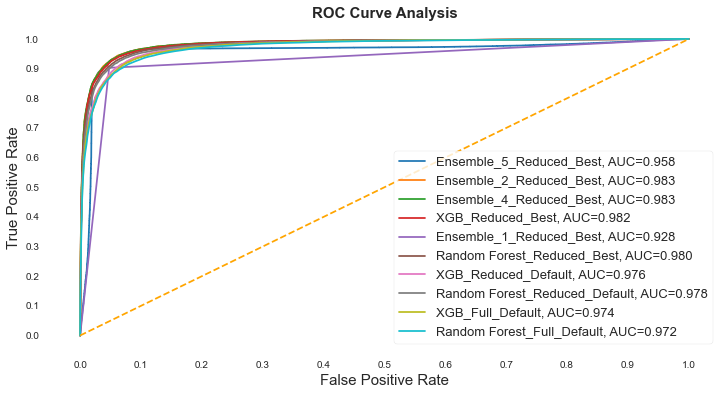

In [77]:
# Plot the data
fig = plt.figure(figsize=(12,6))

for i in roc_plot_df.index:
    plt.plot(roc_plot_df.loc[i]['FPR'], 
             roc_plot_df.loc[i]['TPR'], 
             label="{}, AUC={:.3f}".format(i, roc_plot_df.loc[i]['AUC']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# RESULTS AND RECOMMENDED MODEL
Out of the 16 different models we explore, the one that yielded the most optimal results and drove the cost impact to the business down to the lowest dollar amount was Ensemble Model 5 (Ensemble_5), using the reduced feature dataset and the parameters identified by the Grid Search process. It is not surprising the Ensemble model performed well, given the nature of those models to combine the strengths of several base estimators. The use of Support Vector Machine in Model 5 as the final estimator gave it a slight advantage over Ensemble Model 4, which used Stochastic Gradient Descent as the final estimator. While Model 5 did drive costs down approximately $4,000, the accuracy, recall, and precision scores were almost identical.

In sum, we have provided the business with a comprehensive evaluation of their data and recommended a suite of predictive models from which to select as part of driving down the cost impact of incorrect predictions to their business. Thank you.

![title](img/Results.png)

# <span style="color:red">*SHOULD WE MOVE ROC CURVE DOWN TO HERE*</span>
---

# ADDITIONAL WORK FOR FUTURE PRODUCTION

### Option to Address Data leakage
Data leakage is when test and training data sets share information, essentially making the test set not completely unseen or independent. The goal is to simulate the real world where no information about new data is known. This is violated when imputing or scaling is done on the entire test set and not just the training. One solution for data leakage is to build a pipeline. 

In this example, we begin with the original, complete dataset. We opted to run our resulting recommeded model through a pipeline set up that could reduce data leakage by building pre-processing sets into the modeling process along with cross validation. The steps are repeated for each iteration for the validation. 

In [14]:

# Create a variable "cat_columns" to include all features to be encoded
cat_columns = ['x24', 'x29', 'x30','x32']
# Drop NULLS in categorical features
Business_Data_clean=Business_Data.dropna(subset=cat_columns)

# Clean-up classes in some categorical features for consistency and spelling errors
Business_Data_clean['x24'] = Business_Data_clean['x24'].replace(['asia', 'euorpe','america'], ['Asia', 'Europe','America'])
Business_Data_clean['x29'] = Business_Data_clean['x29'].replace(['sept.', 'January','Dev','July'], ['Sep', 'Jan','Dec','Jul'])
Business_Data_clean['x30'] = Business_Data_clean['x30'].replace(['monday', 'tuesday','wednesday','thurday','friday'], ['Mon', 'Tue','Wed','Thu','Fri'])

# Use the pandas get_dummies function to encode the selected categorical features
Business_Data_clean = pd.get_dummies(Business_Data_clean, prefix_sep="_", drop_first=True, columns=cat_columns)


# Assign the Explanatory features and Response variable to variables X and y respectively  
X = Business_Data_clean.drop(columns=['y'], axis=1)
y = Business_Data_clean.y

# We split the data but use the stratify option to ensure a 
# balanced split of the outcome "y" across the test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

#Reduce features down to only the important ones                   
Important_Feature =['x7','x12','x20','x23','x27','x28','x37','x38','x40','x42','x46','x48','x49']
X_train=X_train[Important_Feature]
X_test=X_test[Important_Feature]      

The pipeline below **imputes** the median for missing values and **scales** continuous variables.

Cross validation is run on the pipeline and model using 5-fold. These results can give us a better idea of how the model will perform in production. 

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#code for later
#Pipeline.steps.pop(1)
#add in a model step at the end 
#Pipeline.steps.append(("classify",DecisionTreeClassifier()))
#find columns to impute
Columns_to_Imp=[X_train.columns.get_loc(c) for c in Important_Feature if c in X_train]
#Step to impute the data 
t1 = [('Impute', SimpleImputer(missing_values = np.nan,strategy='median'), Columns_to_Imp)]
transformer_Impute = ColumnTransformer(transformers=t1,remainder='passthrough')
#Step to scale the data 
t2 = [('scale', MinMaxScaler(),Columns_to_Imp)]
transformer_Scale = ColumnTransformer(transformers=t2,remainder='passthrough')
# define pipeline
pipeline = Pipeline(steps=[('Impute', transformer_Impute),
                           ('Scale', transformer_Scale),
                           #("classify",LogisticRegression(solver = 'lbfgs', random_state=rand_state))])
                           ("classify", StackingClassifier(estimators=ensemble_estimators_5, final_estimator=CalibratedClassifierCV(SVC(gamma = 0.5, random_state=rand_state))))])

### Here, we can compare the results of the pipeline set up to the rest models outlined above. 

In [ ]:

#fit the model
Accuracy_CV=mean(cross_val_score(pipeline,X_train,y=y_train,cv=cv))
pipeline.fit(X_train, y_train)


![title](img/pipelinefitoutput.png)

In [ ]:
y_pred_ens_5 = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

(FP, FN, TP, TN, Cost, Accuracy, Recall, Precision) = confusion_mat(y_test, y_pred_ens_5)
results_df = results_df.append({'Classifier':'Ensemble_5_data_leakage'
                                , 'Features':'Reduced'
                                , 'Parameters': 'Best'
                                , 'Accuracy': Accuracy_CV
                                , 'Recall': Recall
                                , 'Precision': Precision
                                , 'FPR': fpr
                                , 'TPR': tpr
                                , 'AUC': auc
                                , 'True_Positives': TP
                                , 'True_Negatives': TN
                                , 'False_Positives': FP
                                , 'False_Negatives': FN
                                , 'Cost(1000s)': Cost
                               }
                               , ignore_index=True
                              )

![title](img/pipelineconfusionmatrixoutput.png)

Print out results to compare with previous models 

In [ ]:
results_df[['Classifier', 'Features', 'Parameters', 'Accuracy', 'Recall',
            'Precision', 'AUC', 'True_Positives', 'True_Negatives', 
            'False_Positives', 'False_Negatives', 'Cost(1000s)']].sort_values(by = 'Cost(1000s)')

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Classifier</th>      <th>Features</th>      <th>Parameters</th>      <th>Accuracy</th>      <th>Recall</th>      <th>Precision</th>      <th>AUC</th>      <th>True_Positives</th>      <th>True_Negatives</th>      <th>False_Positives</th>      <th>False_Negatives</th>      <th>Cost(1000s)</th>    </tr>  </thead>  <tbody>    <tr>      <th>12</th>      <td>Ensemble_2</td>      <td>Reduced</td>      <td>Best</td>      <td>0.942859</td>      <td>0.942859</td>      <td>0.932398</td>      <td>0.982961</td>      <td>14827</td>      <td>22860</td>      <td>1075</td>      <td>1209</td>      <td>615.25</td>    </tr>    <tr>      <th>14</th>      <td>Ensemble_4</td>      <td>Reduced</td>      <td>Best</td>      <td>0.942708</td>      <td>0.942708</td>      <td>0.932645</td>      <td>0.983313</td>      <td>14816</td>      <td>22865</td>      <td>1070</td>      <td>1220</td>      <td>620.70</td>    </tr>    <tr>      <th>15</th>      <td>Ensemble_5</td>      <td>Reduced</td>      <td>Best</td>      <td>0.942658</td>      <td>0.942658</td>      <td>0.932691</td>      <td>0.957358</td>      <td>14813</td>      <td>22866</td>      <td>1069</td>      <td>1223</td>      <td>622.19</td>    </tr>    <tr>      <th>16</th>      <td>Ensemble_5</td>      <td>Reduced</td>      <td>Best</td>      <td>0.942658</td>      <td>0.942658</td>      <td>0.932691</td>      <td>0.957358</td>      <td>14813</td>      <td>22866</td>      <td>1069</td>      <td>1223</td>      <td>622.19</td>    </tr>    <tr>      <th>17</th>      <td>Ensemble_5_data_leakage</td>      <td>Reduced</td>      <td>Best</td>      <td>[0.9423317488116087, 0.9402885497456426, 0.9405387373863731, 0.9418313735301476, 0.9415811858894171]</td>      <td>0.942083</td>      <td>0.932812</td>      <td>0.957373</td>      <td>14786</td>      <td>22870</td>      <td>1065</td>      <td>1250</td>      <td>635.65</td>    </tr>    <tr>      <th>10</th>      <td>XGB</td>      <td>Reduced</td>      <td>Best</td>      <td>0.939006</td>      <td>0.939006</td>      <td>0.927127</td>      <td>0.982146</td>      <td>14758</td>      <td>22775</td>      <td>1160</td>      <td>1278</td>      <td>650.60</td>    </tr>    <tr>      <th>11</th>      <td>Ensemble_1</td>      <td>Reduced</td>      <td>Best</td>      <td>0.931976</td>      <td>0.931976</td>      <td>0.924189</td>      <td>0.927467</td>      <td>14507</td>      <td>22745</td>      <td>1190</td>      <td>1529</td>      <td>776.40</td>    </tr>    <tr>      <th>9</th>      <td>Random Forest</td>      <td>Reduced</td>      <td>Best</td>      <td>0.933152</td>      <td>0.933152</td>      <td>0.931264</td>      <td>0.979444</td>      <td>14429</td>      <td>22870</td>      <td>1065</td>      <td>1607</td>      <td>814.15</td>    </tr>    <tr>      <th>7</th>      <td>XGB</td>      <td>Reduced</td>      <td>Default</td>      <td>0.925171</td>      <td>0.925171</td>      <td>0.913996</td>      <td>0.975660</td>      <td>14400</td>      <td>22580</td>      <td>1355</td>      <td>1636</td>      <td>831.55</td>    </tr>    <tr>      <th>6</th>      <td>Random Forest</td>      <td>Reduced</td>      <td>Default</td>      <td>0.930525</td>      <td>0.930525</td>      <td>0.931524</td>      <td>0.978250</td>      <td>14311</td>      <td>22883</td>      <td>1052</td>      <td>1725</td>      <td>873.02</td>    </tr>    <tr>      <th>4</th>      <td>XGB</td>      <td>Full</td>      <td>Default</td>      <td>0.921643</td>      <td>0.921643</td>      <td>0.911690</td>      <td>0.973989</td>      <td>14288</td>      <td>22551</td>      <td>1384</td>      <td>1748</td>      <td>887.84</td>    </tr>    <tr>      <th>3</th>      <td>Random Forest</td>      <td>Full</td>      <td>Default</td>      <td>0.917565</td>      <td>0.917565</td>      <td>0.926834</td>      <td>0.971895</td>      <td>13833</td>      <td>22843</td>      <td>1092</td>      <td>2203</td>      <td>1112.42</td>    </tr>    <tr>      <th>5</th>      <td>Decision Tree</td>      <td>Reduced</td>      <td>Default</td>      <td>0.856746</td>      <td>0.856746</td>      <td>0.822228</td>      <td>0.850729</td>      <td>13154</td>      <td>21091</td>      <td>2844</td>      <td>2882</td>      <td>1469.44</td>    </tr>    <tr>      <th>8</th>      <td>Decision Tree</td>      <td>Reduced</td>      <td>Best</td>      <td>0.847514</td>      <td>0.847514</td>      <td>0.813656</td>      <td>0.854858</td>      <td>12894</td>      <td>20982</td>      <td>2953</td>      <td>3142</td>      <td>1600.53</td>    </tr>    <tr>      <th>2</th>      <td>Decision Tree</td>      <td>Full</td>      <td>Default</td>      <td>0.839384</td>      <td>0.839384</td>      <td>0.798522</td>      <td>0.833216</td>      <td>12861</td>      <td>20690</td>      <td>3245</td>      <td>3175</td>      <td>1619.95</td>    </tr>    <tr>      <th>13</th>      <td>Ensemble_3</td>      <td>Reduced</td>      <td>Best</td>      <td>0.84819</td>      <td>0.848190</td>      <td>0.821881</td>      <td>0.854858</td>      <td>12726</td>      <td>21177</td>      <td>2758</td>      <td>3310</td>      <td>1682.58</td>    </tr>    <tr>      <th>1</th>      <td>Gaussian Naive-Bayes</td>      <td>Full</td>      <td>Default</td>      <td>0.6894</td>      <td>0.689400</td>      <td>0.639344</td>      <td>0.742411</td>      <td>8307</td>      <td>19249</td>      <td>4686</td>      <td>7729</td>      <td>3911.36</td>    </tr>    <tr>      <th>0</th>      <td>Logistic Regression</td>      <td>Full</td>      <td>Default</td>      <td>0.707338</td>      <td>0.707338</td>      <td>0.678519</td>      <td>0.765416</td>      <td>8244</td>      <td>20029</td>      <td>3906</td>      <td>7792</td>      <td>3935.06</td>    </tr>  </tbody></table>

---
# REFERENCES

Notebook code adapted from Capstone Project work by Kevin Mendonsa, Vivek Viswanathan, and Maureen Stolberg: **"Predicting Attrition - a Driver for Creating Value, Realizing Strategy, and Refining Key HR Processes"**

Additionally, the following websites were helpful resources for framing our work, explaining details, and example code.

- https://jamesrledoux.com/code/imputation
- https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
- https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
- https://stackoverflow.com/questions/60393024/rfecv-for-classification-giving-keyerror-weight
- https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html
- https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
- https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e
- https://scikit-learn.org/stable/modules/ensemble.html
- https://towardsdatascience.com/boosting-algorithm-xgboost-4d9ec0207d
- https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15
- https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
-https://towardsdatascience.com/data-leakage-in-machine-learning-10bdd3eec742#:~:text=Causes%20of%20Data%20Leakage%201%20Pre-processing.%20A%20very,are%20dependencies%20between%20your%20test%20and%20train%20set.